In [ ]:
# Filtering out the warnings 
import warnings
warnings.filterwarnings('ignore')

# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(13,10)})
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# **EDA Case Study**


> #### **Problem Statement:** To analyze the patterns in dataset of loan providing companies and consumers,  which may be used for taking actions against defaulters and will ensure that the consumers capable of repaying the loan are not rejected.

> #### **Analysis Approach:**

In [ ]:
#reading the csv files
app = pd.read_csv("application_data.csv")
#prev = pd.read_csv("previous_application.csv")
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

###  **Inspecting** **the** **Dataframe**


In [ ]:
app.shape

(27166, 122)

In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27166 entries, 0 to 27165
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 25.3+ MB


In [ ]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,27166.000000,27166.000000,27166.000000,2.716600e+04,2.716600e+04,27166.000000,2.714400e+04,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,9201.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,11879.000000,2.709800e+04,21820.000000,13433.000000,11346.000000,13931.000000,9109.000000,8139.000000,12760.000000,13543.000000,13720.000000,8749.000000,11053.000000,8565.000000,13509.000000,8293.000000,12260.000000,13433.000000,11346.000000,13931.000000,9109.000000,8139.000000,12760.000000,13543.000000,13720.000000,8749.000000,11053.000000,8565.000000,13509.000000,8293.000000,12260.000000,13433.000000,11346.000000,13931.000000,9109.000000,8139.000000,12760.000000,13543.000000,13720.000000,8749.000000,11053.000000,8565.000000,13509.000000,8293.000000,12260.000000,14084.000000,27070.000000,27070.000000,27070.000000,27070.000000,27165.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.0,27166.000000,27166.0,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,23532.000000,23532.000000,23532.000000,23532.000000,23531.000000,23531.000000
mean,115824.507730,0.080063,0.417065,1.727825e+05,6.005350e+05,27157.110230,5.398878e+05,0.020801,-16033.847456,63790.226607,-4966.586505,-2987.581720,12.066732,0.999963,0.819885,0.200324,0.997865,0.278363,0.056284,2.157881,2.049105,2.028418,12.069388,0.016638,0.050983,0.039498,0.082162,0.233601,0.180041,0.503852,5.151752e-01,0.511434,0.117375,0.089193,0.978725,0.750514,0.044266,0.077676,0.150787,0.224831,0.231661,0.067028,0.100616,0.107479,0.008815,0.028223,0.113947,0.088141,0.978024,0.757667,0.042053,0.073249,0.146245,0.220937,0.228236,0.065378,0.105254,0.105737,0.008013,0.027030,0.117833,0.088818,0.978700,0.753845,0.044225,0.076976,0.150358,0.224436,0.231627,0.067733,0.101964,0.108721,0.008713,0.028224,0.101994,

In [ ]:
app.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                    22
NAME_TYPE_SUITE                   113
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     17965
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

### **Data** **Cleaning**

In [ ]:
#remove null func
def removeNull(df, axis, percent):
  if axis == 0:
    NA_rows = df.transpose().isnull().sum()
    NA_rows = list(NA_rows[NA_rows.values > percent*len(df)].index)
    df1 = df.drop(df.index[NA_rows])
  else:              
    NA_col = df.isnull().sum()
    NA_col = list(NA_col[NA_col.values >(percent*len(app))].index)
    df1 = df.drop(labels= NA_col, axis=1)
  print(df1.shape)
  return df1

In [ ]:
#Remove columns where NA values are more than or equal to 30%
app1= removeNull(app, 1, 0.3)

(27166, 72)


In [ ]:
#Remove rows where NA values are more than or equal to 30%
app2 = removeNull(app1, 0, 0.3)

(27166, 72)


In [ ]:
app2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27166 entries, 0 to 27165
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   27166 non-null  int64  
 1   TARGET                       27166 non-null  int64  
 2   NAME_CONTRACT_TYPE           27166 non-null  object 
 3   CODE_GENDER                  27166 non-null  object 
 4   FLAG_OWN_CAR                 27166 non-null  object 
 5   FLAG_OWN_REALTY              27166 non-null  object 
 6   CNT_CHILDREN                 27166 non-null  int64  
 7   AMT_INCOME_TOTAL             27166 non-null  float64
 8   AMT_CREDIT                   27166 non-null  float64
 9   AMT_ANNUITY                  27166 non-null  float64
 10  AMT_GOODS_PRICE              27144 non-null  float64
 11  NAME_TYPE_SUITE              27053 non-null  object 
 12  NAME_INCOME_TYPE             27166 non-null  object 
 13  NAME_EDUCATION_T

In [ ]:
#checking null value percentage
app2.isnull().sum()/len(app2)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.080984
NAME_TYPE_SUITE                 0.415961
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [ ]:
#filling up AMT_ANNUITY null values
app2.AMT_ANNUITY.describe()

count     27166.000000
mean      27157.110230
std       14653.348609
min        2052.000000
25%       16506.000000
50%       24997.500000
75%       34678.125000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

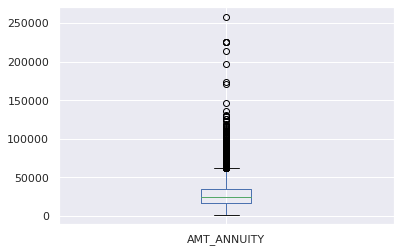

In [ ]:
#Plot box plot to see the kind of distribution of AMT_ANNUITY
app2.AMT_ANNUITY.plot.box()

Seems like there are a lot of outliers. Lets see the data distribution of percentiles to decide what can be done with missing values.


In [ ]:
app2.AMT_ANNUITY.quantile([0.25,0.5,0.75,0.90,0.95,1])

0.25     16506.000
0.50     24997.500
0.75     34678.125
0.90     46044.000
0.95     53242.875
1.00    258025.500
Name: AMT_ANNUITY, dtype: float64

As above we can see there is a lot of difference between 95%ile and max value, so we can impute the values with median.

In [ ]:
#filling missing values by median, as column has large value outlier
val = app2["AMT_ANNUITY"].median()
app2['AMT_ANNUITY'].fillna(val, inplace=True)

In [ ]:
#checking null values in each column 
app2.isnull().sum()/len(app2)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.080984
NAME_TYPE_SUITE                 0.415961
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [ ]:
app2.AMT_GOODS_PRICE.describe()

count    2.714400e+04
mean     5.398878e+05
std      3.695203e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
app2.AMT_GOODS_PRICE.value_counts().sort_values(ascending = False)

450000.0     2268
675000.0     2202
225000.0     2196
900000.0     1380
270000.0     1024
180000.0      895
1125000.0     810
454500.0      793
135000.0      709
679500.0      453
315000.0      450
1350000.0     439
238500.0      411
247500.0      402
360000.0      378
463500.0      355
540000.0      331
495000.0      288
405000.0      285
90000.0       283
202500.0      280
472500.0      252
157500.0      235
585000.0      235
337500.0      217
112500.0      217
229500.0      211
630000.0      209
1800000.0     197
720000.0      166
688500.0      162
810000.0      162
148500.0      155
1575000.0     146
292500.0      137
67500.0       135
477000.0      133
697500.0      127
283500.0      126
765000.0      124
252000.0      122
382500.0      119
904500.0      119
945000.0      110
234000.0      106
855000.0      104
913500.0      103
45000.0       101
1129500.0      98
328500.0       95
103500.0       92
459000.0       91
193500.0       79
1354500.0      77
702000.0       77
481500.0  

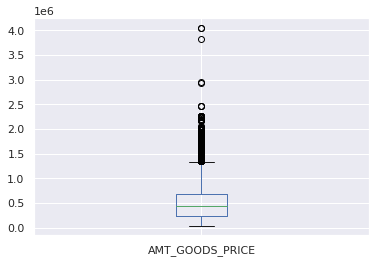

In [ ]:
app2.AMT_GOODS_PRICE.plot.box()

In [ ]:
app2.AMT_GOODS_PRICE.quantile([0.25,0.5,0.75,0.90,0.95,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
0.95    1305000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

Again for AMT_GOODS_PRICE we can see a good jump from 95% percentile to max value which indicates mean is not a true indicator of missing values and thus will hamper the values. So median will work out considering the Bill Gates example of salary.

In [ ]:
# filling AMT_GOODS_PRICE null values with mean value
val = app2["AMT_GOODS_PRICE"].median()
app2['AMT_GOODS_PRICE'].fillna(val, inplace=True)

In [ ]:
app2.isnull().sum()/len(app2)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.415961
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

<BarContainer object of 7 artists>

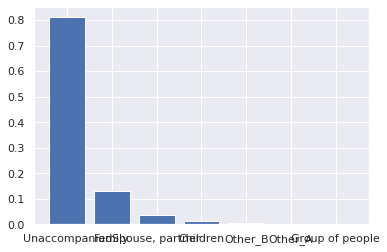

In [ ]:

data = app2['NAME_TYPE_SUITE'].value_counts(normalize=True)
plt.bar(data.index,data.values)

NAME_TYPE_SUITE can be replaced with the mode of the data since it is non numeric and categorically unordered variable. So we can safely replace it with mode.

In [ ]:
app2.isnull().sum()/len(app2)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.415961
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [ ]:
app2.CNT_FAM_MEMBERS.describe()

count    27166.000000
mean         2.157881
std          0.910010
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
app2.CNT_FAM_MEMBERS.value_counts().sort_values(ascending = False)

2.0     14089
1.0      5880
3.0      4687
4.0      2127
5.0       332
6.0        36
7.0         8
8.0         3
9.0         2
10.0        2
Name: CNT_FAM_MEMBERS, dtype: int64

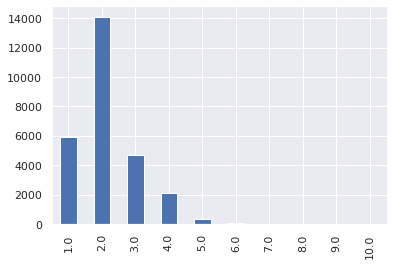

In [ ]:
(app2['CNT_FAM_MEMBERS'].value_counts()).sort_index().plot(kind='bar')

In [ ]:
app2.CNT_FAM_MEMBERS.value_counts().sort_values(ascending = False)

2.0     14089
1.0      5880
3.0      4687
4.0      2127
5.0       332
6.0        36
7.0         8
8.0         3
9.0         2
10.0        2
Name: CNT_FAM_MEMBERS, dtype: int64

0.25    0.393980
0.50    0.565464
0.75    0.664518
0.90    0.722235
0.95    0.747873
1.00    0.855000
Name: EXT_SOURCE_2, dtype: float64

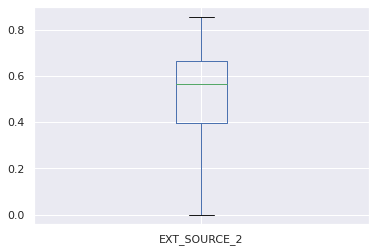

In [ ]:
app2['EXT_SOURCE_2'].plot.box()
app2['EXT_SOURCE_2'].quantile([0.25,0.5,0.75,0.90,0.95,1])

In [ ]:
app2.EXT_SOURCE_2.mean()

0.5151751711434199

Seems like mean/median is same for the EXT_SOURCE_2 , so we can go with mean.

In [ ]:
val = app2["EXT_SOURCE_2"].mean()
app2['EXT_SOURCE_2'].fillna(val, inplace=True)

In [ ]:
app2['CODE_GENDER'].value_counts()
val = app2['CODE_GENDER'].mode()
#app2.replace(to_replace = np.nan, value = -99)  
app2['CODE_GENDER'].fillna(val, inplace=True)

In [ ]:
#check for other wrong values
app2['NAME_FAMILY_STATUS'] = app2['NAME_FAMILY_STATUS'].replace('Unknown',np.nan)
val = app2['NAME_FAMILY_STATUS'].mode()
print(val[0])
app2['NAME_FAMILY_STATUS'].replace(to_replace = np.nan, value = val[0])
app2['NAME_FAMILY_STATUS'].value_counts()

Married


Married                 17497
Single / not married     3916
Civil marriage           2628
Separated                1708
Widow                    1417
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
app2['ORGANIZATION_TYPE'].value_counts()
app2['ORGANIZATION_TYPE'] = app2['ORGANIZATION_TYPE'].replace('XNA',np.nan)
val = app2['ORGANIZATION_TYPE'].mode()
print(val[0])
app2['ORGANIZATION_TYPE'].replace(to_replace = np.nan, value = val[0])
app2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3


Business Entity Type 3    5928
Self-employed             3426
Other                     1485
Medicine                  1002
Government                 936
Business Entity Type 2     919
School                     823
Trade: type 7              665
Kindergarten               613
Construction               562
Business Entity Type 1     503
Transport: type 4          441
Trade: type 3              317
Industry: type 9           306
Security                   291
Industry: type 3           291
Housing                    270
Industry: type 11          247
Bank                       243
Military                   236
Transport: type 2          228
Agriculture                200
Police                     194
Postal                     180
Security Ministries        172
Services                   168
Trade: type 2              163
Restaurant                 139
Industry: type 7           125
Transport: type 3          107
University                 106
Hotel                      104
Industry

In [ ]:
# removing unwanted columns from dataframe
#list(app3)
'''
unwanted = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
'''

"\nunwanted = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',\n       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',\n       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',\n       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',\n       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',\n       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']\n"

In [ ]:
#app3.drop(labels = unwanted , axis=1, inplace = True)

In [ ]:
#app3.info()

In [ ]:
app2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#get columns starting with DAYS
def get_cols_starting_with_days():
  days_col = [col for col in app2 if col.startswith('DAYS_')]
  return days_col
cols_to_abs = get_cols_starting_with_days()
cols_to_abs

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [ ]:
app2[cols_to_abs] = app2[cols_to_abs].abs()
app2[cols_to_abs]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...
27161,13527.0,5954.0,635.0,4759.0,696.0
27162,24541.0,365243.0,1175.0,4545.0,954.0
27163,21858.0,365243.0,537.0,2671.0,768.0
27164,21813.0,1659.0,6918.0,4426.0,0.0


***Get the ages of people***

In [ ]:
app2['DAYS_BIRTH'].apply(lambda x : x // 365).describe()

count    27166.000000
mean        43.427004
std         11.950229
min         21.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         68.000000
Name: DAYS_BIRTH, dtype: float64

In [ ]:
app2['AGE_YEARS'] = app2['DAYS_BIRTH'].apply(lambda x : x // 365)
app2['AGE_YEARS'].describe()

count    27166.000000
mean        43.427004
std         11.950229
min         21.000000
25%         33.000000
50%         43.000000
75%         53.000000
max         68.000000
Name: AGE_YEARS, dtype: float64

In [ ]:
app2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
count,27166.000000,27166.000000,27166.000000,2.716600e+04,2.716600e+04,27166.000000,2.716600e+04,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,2.716600e+04,21820.000000,27070.000000,27070.000000,27070.000000,27070.000000,27165.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.0,27166.000000,27166.0,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,27166.000000,23532.000000,23532.000000,23532.000000,23532.000000,23531.000000,23531.000000,27166.000000
mean,115824.507730,0.080063,0.417065,1.727825e+05,6.005350e+05,27157.110230,5.398150e+05,0.020801,16033.847456,67727.369874,4966.586505,2987.581720,0.999963,0.819885,0.200324,0.997865,0.278363,0.056284,2.157881,2.049105,2.028418,12.069388,0.016638,0.050983,0.039498,0.082162,0.233601,0.180041,5.151752e-01,0.511434,1.429959,0.145475,1.413225,0.101182,963.884594,0.000037,0.711846,0.000184,0.015350,0.087131,0.000258,0.079879,0.003718,0.0,0.004307,0.0,0.003203,0.002761,0.000920,0.010528,0.000294,0.008025,0.000699,0.000589,0.000442,0.006969,0.007607,0.033401,0.272225,0.262335,1.886958,43.427004
std,9123.754807,0.271396,0.723832,7.157358e+05,4.018832e+05,14653.348609,3.693795e+05,0.013797,4361.745567,139430.751241,3522.821329,1510.936967,0.006067,0.384290,0.400250,0.046158,0.448201,0.230473,0.910010,0.507789,0.502234,3.235571,0.127915,0.219967,0.194780,0.274616,0.423129,0.384229,1.898125e-01,0.194212,2.325285,0.447846,2.306309,0.364473,826.447749,0.006067,0.452912,0.013566,0.122943,0.282032,0.016050,0.271111,0.060862,0.0,0.065486,0.0,0.056501,0.052472,0.030323,0.102066,0.017158,0.089222,0.026437,0.024262,0.021013,0.085211,0.111327,0.197057,0.939641,0.612090,1.862659,11.950229
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,7680.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,107921.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,12374.000000,942.000000,1984.500000,1719.250000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Need to find outliers in the numeric variables to see the impact on analysis

In [ ]:
def get_cols_starting_with_amt():
  amt_col = [col for col in app2 if col.startswith('AMT_')]
  return amt_col
cols_to_abs = get_cols_starting_with_amt()
cols_to_abs

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

Take first 4 values from above as others seem to not impact analysis majorly as of now.

In [ ]:
cols_to_abs = cols_to_abs[:4]

In [ ]:
for col in cols_to_abs : 
    print(col,'\n',app2[col].quantile([0.25,0.5,0.75,0.90,0.95,1]),'\n\n')

AMT_INCOME_TOTAL 
 0.25       112500.0
0.50       144900.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64 


AMT_CREDIT 
 0.25     270000.0
0.50     518562.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64 


AMT_ANNUITY 
 0.25     16506.000
0.50     24997.500
0.75     34678.125
0.90     46044.000
0.95     53242.875
1.00    258025.500
Name: AMT_ANNUITY, dtype: float64 


AMT_GOODS_PRICE 
 0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
0.95    1305000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64 




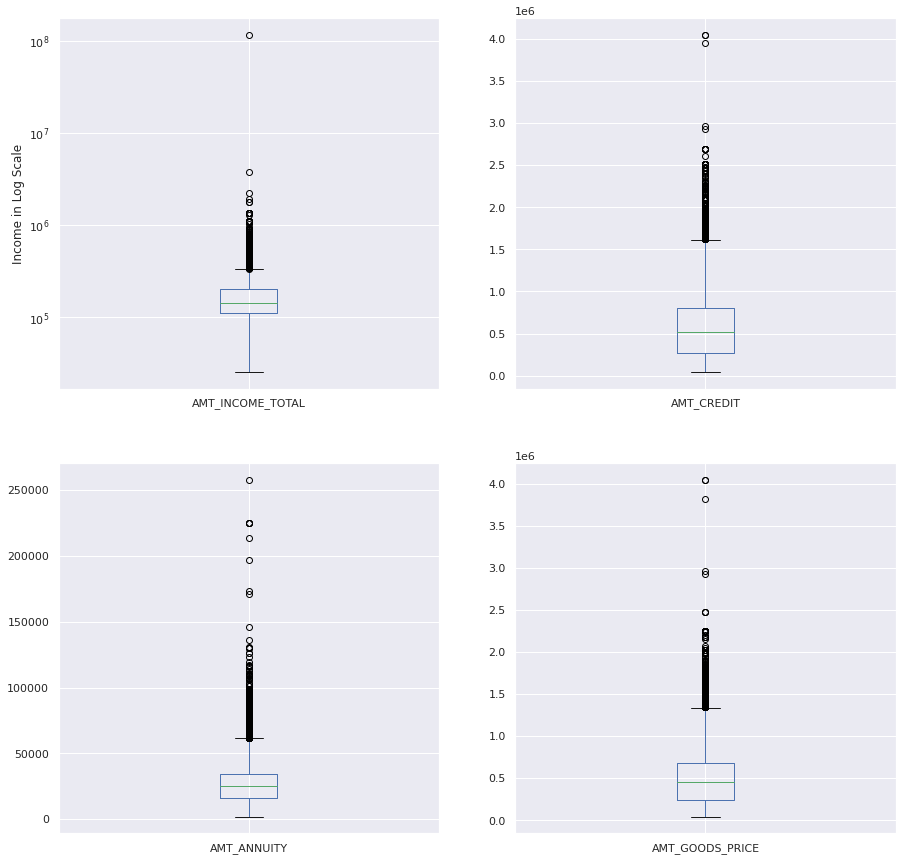

In [ ]:
# code taken from earlier module since did not remember the exact plotting functions
fig,ax = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0,0].set_yscale('log')
ax[0,0].set(ylabel ='Income in Log Scale')
app2[cols_to_abs[0]].plot.box(ax=ax[0,0],);
app2[cols_to_abs[1]].plot.box(ax=ax[0,1]);
app2[cols_to_abs[2]].plot.box(ax=ax[1,0]);
app2[cols_to_abs[3]].plot.box(ax=ax[1,1]);

Interestingly, we can see all these values have outliers after 95%ile, which means we can cap the max value to 95%ile for each of these columns.

In [ ]:
#DO NOT EXECUTE THIS
'''
for col in cols_to_abs:
    percentiles = app2[col].quantile([0.01,0.95]).values
    app2[col] = np.clip(app2[col], percentiles[0], percentiles[1])
for col in cols_to_abs : 
    print(col,'\n',app2[col].quantile([0.25,0.5,0.75,0.90,0.95,1]),'\n\n')
'''

"\nfor col in cols_to_abs:\n    percentiles = app2[col].quantile([0.01,0.95]).values\n    app2[col] = np.clip(app2[col], percentiles[0], percentiles[1])\nfor col in cols_to_abs : \n    print(col,'\n',app2[col].quantile([0.25,0.5,0.75,0.90,0.95,1]),'\n\n')\n"

In [ ]:
for col in cols_to_abs : 
    print(col,'\n',app2[col].quantile([0.25,0.5,0.75,0.90,0.95,1]),'\n\n')

AMT_INCOME_TOTAL 
 0.25       112500.0
0.50       144900.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64 


AMT_CREDIT 
 0.25     270000.0
0.50     518562.0
0.75     808650.0
0.90    1133748.0
0.95    1350000.0
1.00    4050000.0
Name: AMT_CREDIT, dtype: float64 


AMT_ANNUITY 
 0.25     16506.000
0.50     24997.500
0.75     34678.125
0.90     46044.000
0.95     53242.875
1.00    258025.500
Name: AMT_ANNUITY, dtype: float64 


AMT_GOODS_PRICE 
 0.25     238500.0
0.50     450000.0
0.75     679500.0
0.90    1093500.0
0.95    1305000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64 




In [ ]:
# Categorical column Check
app2.CODE_GENDER.value_counts()

F    17900
M     9266
Name: CODE_GENDER, dtype: int64

In [ ]:
app2.FLAG_OWN_CAR.value_counts()

N    17965
Y     9201
Name: FLAG_OWN_CAR, dtype: int64

In [ ]:
app2.FLAG_OWN_REALTY.value_counts()

Y    18844
N     8322
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:
app2.CODE_GENDER.value_counts()

F    17900
M     9266
Name: CODE_GENDER, dtype: int64

In [ ]:
app2['CODE_GENDER'].value_counts()

F    17900
M     9266
Name: CODE_GENDER, dtype: int64

In [ ]:
app2.FLAG_OWN_REALTY.value_counts()

Y    18844
N     8322
Name: FLAG_OWN_REALTY, dtype: int64

In [ ]:

app2.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    5928
Self-employed             3426
Other                     1485
Medicine                  1002
Government                 936
Business Entity Type 2     919
School                     823
Trade: type 7              665
Kindergarten               613
Construction               562
Business Entity Type 1     503
Transport: type 4          441
Trade: type 3              317
Industry: type 9           306
Security                   291
Industry: type 3           291
Housing                    270
Industry: type 11          247
Bank                       243
Military                   236
Transport: type 2          228
Agriculture                200
Police                     194
Postal                     180
Security Ministries        172
Services                   168
Trade: type 2              163
Restaurant                 139
Industry: type 7           125
Transport: type 3          107
University                 106
Hotel                      104
Industry

In [ ]:
app2.ORGANIZATION_TYPE.describe()
#nearly 17% of the column has "XNA" drop or not ?

count                      22275
unique                        57
top       Business Entity Type 3
freq                        5928
Name: ORGANIZATION_TYPE, dtype: object

In [ ]:
app2.shape

(27166, 73)

In [ ]:
app2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27166 entries, 0 to 27165
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   27166 non-null  int64  
 1   TARGET                       27166 non-null  int64  
 2   NAME_CONTRACT_TYPE           27166 non-null  object 
 3   CODE_GENDER                  27166 non-null  object 
 4   FLAG_OWN_CAR                 27166 non-null  object 
 5   FLAG_OWN_REALTY              27166 non-null  object 
 6   CNT_CHILDREN                 27166 non-null  int64  
 7   AMT_INCOME_TOTAL             27166 non-null  float64
 8   AMT_CREDIT                   27166 non-null  float64
 9   AMT_ANNUITY                  27166 non-null  float64
 10  AMT_GOODS_PRICE              27166 non-null  float64
 11  NAME_TYPE_SUITE              27053 non-null  object 
 12  NAME_INCOME_TYPE             27166 non-null  object 
 13  NAME_EDUCATION_T

25650.0 117000000.0
Income Range	 Count
125000-150000       4227
100000-125000       3789
200000-225000       3583
75000-100000        3497
150000-175000       3031
175000-200000       2596
50000-75000         1768
250000-275000       1145
225000-250000        662
300000-325000        606
25000-50000          436
350000-375000        414
275000-300000        397
425000-450000        269
500000 and above     246
325000-350000        178
400000-425000        168
375000-400000        111
475000-500000         26
450000-475000         17
0-25000                0
Name: INCOME_BIN, dtype: int64


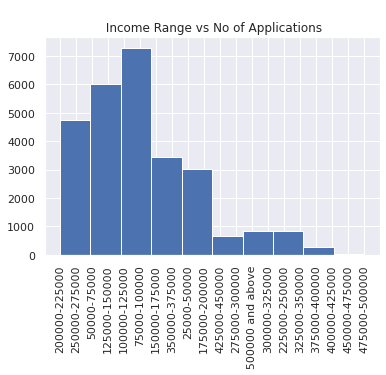

In [ ]:
# Creating bins for income amount
#get min and max value of AMT_INCOME_TOTAL
income_min = app2.AMT_INCOME_TOTAL.min()
income_max = app2.AMT_INCOME_TOTAL.max()
print(income_min, income_max)
def get_interval_from_bins(bins):
  intervals = []
  for i in range(0, len(bins) - 1):
    intervals.append(str(bins[i]) + '-' + str(bins[i + 1]))
  intervals[-1] = str(bins[-2]) + ' and above'
  return intervals
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, 117000000]
intervals = get_interval_from_bins(bins)
app2['INCOME_BIN'] = pd.cut(app2['AMT_INCOME_TOTAL'], bins, labels=intervals)
print('Income Range\t Count')
print(app2['INCOME_BIN'].value_counts())

plt.hist(app2['INCOME_BIN'])

plt.title('\n Income Range vs No of Applications')
plt.xticks(rotation=90);

45000.0 4050000.0
450000.0     839
675000.0     769
225000.0     730
270000.0     665
180000.0     634
            ... 
273028.5       1
171841.5       1
1288782.0      1
795757.5       1
622575.0       1
Name: AMT_CREDIT, Length: 2775, dtype: int64
0.1     180000.0
0.2     254700.0
0.3     310585.5
0.4     439740.0
0.5     518562.0
0.6     610483.5
0.7     755190.0
0.8     900000.0
0.9    1133748.0
1.0    4050000.0
Name: AMT_CREDIT, dtype: float64
Income Range	 Count
950000 and above    4769
250000-320000       3366
0-180000            2948
180000-250000       2341
390000-460000       2045
530000-600000       2026
460000-530000       1941
740000-810000       1690
670000-740000       1635
320000-390000       1469
880000-950000       1174
600000-670000        991
810000-880000        771
Name: AMT_CREDIT_BIN, dtype: int64


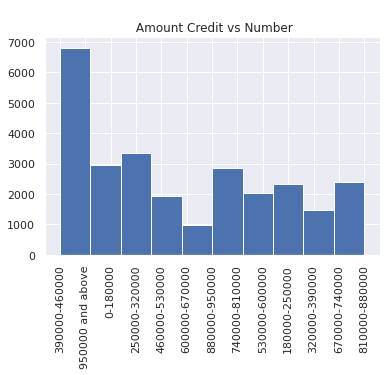

In [ ]:
credit_min = app2.AMT_CREDIT.min()
credit_max = app2.AMT_CREDIT.max()
print(credit_min, credit_max)
print(app2.AMT_CREDIT.value_counts())
print(app2['AMT_CREDIT'].quantile([0.10,0.20,0.30,0.40,0.50,0.60, 0.70, 0.80, 0.90, 1]))

bins = [ 0, 180000, 250000, 320000, 390000, 460000, 530000, 600000, 670000, 740000, 810000, 880000, 950000, 1000000000 ]
intervals = get_interval_from_bins(bins)
app2['AMT_CREDIT_BIN'] = pd.cut(app2['AMT_CREDIT'], bins, labels=intervals)
print('Income Range\t Count')
print(app2['AMT_CREDIT_BIN'].value_counts())

income_bin = app2['AMT_CREDIT_BIN'].value_counts()
plt.hist(app2['AMT_CREDIT_BIN'])

plt.title('\n Amount Credit vs Number')
plt.xticks(rotation=90);


Data Imbalance

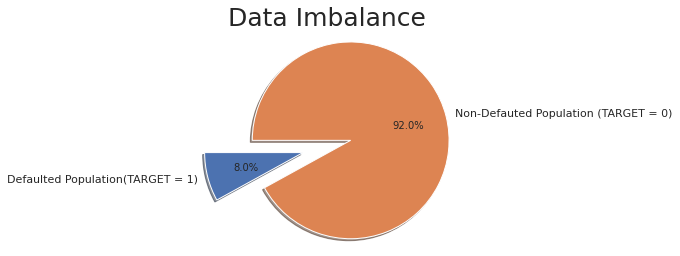

In [ ]:
app2['TARGET'].value_counts(normalize=True)
c0 = 0
c1 = 0
for val in app2['TARGET'].values:
    if val == 1:
        c1 += 1
    else:
        c0 += 1
        
c1 = (c1 / len(app2['TARGET'])) * 100
c0 = (c0 / len(app2['TARGET'])) * 100

x = ['Defaulted Population(TARGET = 1)','Non-Defauted Population (TARGET = 0)']
y = [c1, c0]

explode = (0.5, 0)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')
plt.title('Data Imbalance', fontsize = 25)
plt.show()

The data is skewed towards non defaulted population as it can be seen very clearly.

In [ ]:
app2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27166 entries, 0 to 27165
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   27166 non-null  int64   
 1   TARGET                       27166 non-null  int64   
 2   NAME_CONTRACT_TYPE           27166 non-null  object  
 3   CODE_GENDER                  27166 non-null  object  
 4   FLAG_OWN_CAR                 27166 non-null  object  
 5   FLAG_OWN_REALTY              27166 non-null  object  
 6   CNT_CHILDREN                 27166 non-null  int64   
 7   AMT_INCOME_TOTAL             27166 non-null  float64 
 8   AMT_CREDIT                   27166 non-null  float64 
 9   AMT_ANNUITY                  27166 non-null  float64 
 10  AMT_GOODS_PRICE              27166 non-null  float64 
 11  NAME_TYPE_SUITE              27053 non-null  object  
 12  NAME_INCOME_TYPE             27166 non-null  object  
 13  N

In [ ]:
cols_to_consider = [ 'SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED','FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE' ,'AGE_YEARS', 'INCOME_BIN', 'AMT_CREDIT_BIN' ]
print(cols_to_consider)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AGE_YEARS', 'INCOME_BIN', 'AMT_CREDIT_BIN']


In [ ]:
bins= [21, 25, 29,33,37,41,45,49,53,57,61,65,68]
intervals = get_interval_from_bins(bins)
app2["AGE_GROUP"] = pd.cut(app2['AGE_YEARS'], bins, labels=intervals)
print('AGE_GROUP\t Count')
print(app2.AGE_GROUP.value_counts().sort_values(ascending= False))

AGE_GROUP	 Count
37-41           3053
29-33           2917
33-37           2870
41-45           2748
25-29           2498
53-57           2487
45-49           2484
49-53           2425
57-61           2129
61-65           1669
21-25           1337
65 and above     448
Name: AGE_GROUP, dtype: int64


In [ ]:
app2_target0 = app2.loc[app2["TARGET"] == 0]
app2_target1 = app2.loc[app2["TARGET"] == 1]

### Analysis 

***Univariate Analysis***

In [ ]:
def describe_column(dfs, col_names):
  for df in dfs:
    for col in col_names:
      print(df[col].describe().apply(lambda x: format(x, 'f')))

def plt_box(dfs, index_names, col_names, scale):
  plt.figure(figsize=(8, 6))
  for i in range(0, len(dfs)):
    ax = sns.boxplot(x = index_names[i], y = col_names[i], data = dfs[i])
    title = col_names[i] +' vs '+ index_names[i]
    ax.set(title=title)

    if scale[i] == 'log' :
      plt.yscale('log')
      ax.set(ylabel=col_names[i] + '(Log Scale)')
    plt.show()

def num_univariate_box(column_name, scale='linear') : 
  # boxplot for column vs target
  plt.figure(figsize=(8,6))
  ax = sns.boxplot(x='TARGET', y = column_name, data = app2)
  title = column_name+' vs Target'
  ax.set(title=title)
  if scale == 'log' :
      plt.yscale('log')
      ax.set(ylabel=column_name + '(Log Scale)')
  # summary statistic
  print('TARGET : 0')
  print(app2_target0[column_name].describe(),'\n')
  print('TARGET : 1')
  print(app2_target1[column_name].describe())

def categorical_univariate_countplot(column_name,figsize=(10,5)) : 
  # column vs target count plot
  plt.figure(figsize=figsize)
  ax = sns.countplot(x=column_name, hue='TARGET', data=app2)
  title = column_name + ' vs Number of Applications'
  ax.set(title= title)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, format(height), ha="center")

In [ ]:
#Check for credit amount for multiple target values ( 0 and 1 )
describe_column([app2_target0, app2_target1], ['AMT_CREDIT'])

count      24991.000000
mean      604381.108899
std       406700.958969
min        45000.000000
25%       270000.000000
50%       518562.000000
75%       814041.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object
count       2175.000000
mean      556342.171034
std       338646.234353
min        50940.000000
25%       284400.000000
50%       495216.000000
75%       740459.250000
max      2961000.000000
Name: AMT_CREDIT, dtype: object


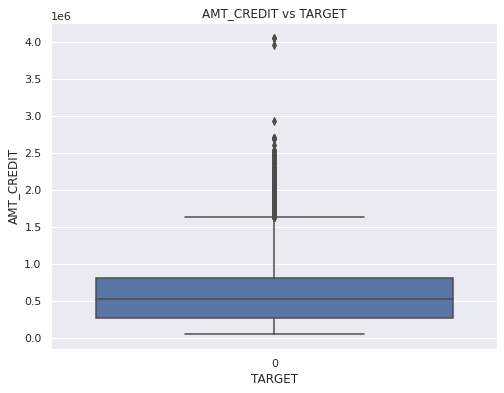

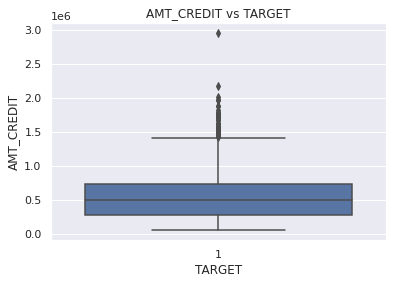

In [ ]:
plt_box([app2_target0, app2_target1], ['TARGET', 'TARGET'], ['AMT_CREDIT', 'AMT_CREDIT'], ['linear', 'linear'])

The median seems to be almost similar for both the targets.
People with higher amount of credit have more chances to fall in the category 'of All other cases'. 

**Unordered Categorical Variables**

In [ ]:
#function to plot count plot for both the target 0 and 1 for a column.
def count_plot_dfs(col):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 2, 1)
    sns.countplot(col, data=app2_target0)
    plt.title('Distribution of '+ '%s' %col +' for Non-Defaulters(Target 0)', fontsize=14)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(col, data=app2_target1)
    plt.title('Distribution of '+ '%s' %col +' for Defaulters(Target 1)', fontsize=14)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [ ]:
train_categorical = app2.select_dtypes(include=['object']).columns
app2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

Plotting  NAME_CONTRACT_TYPE


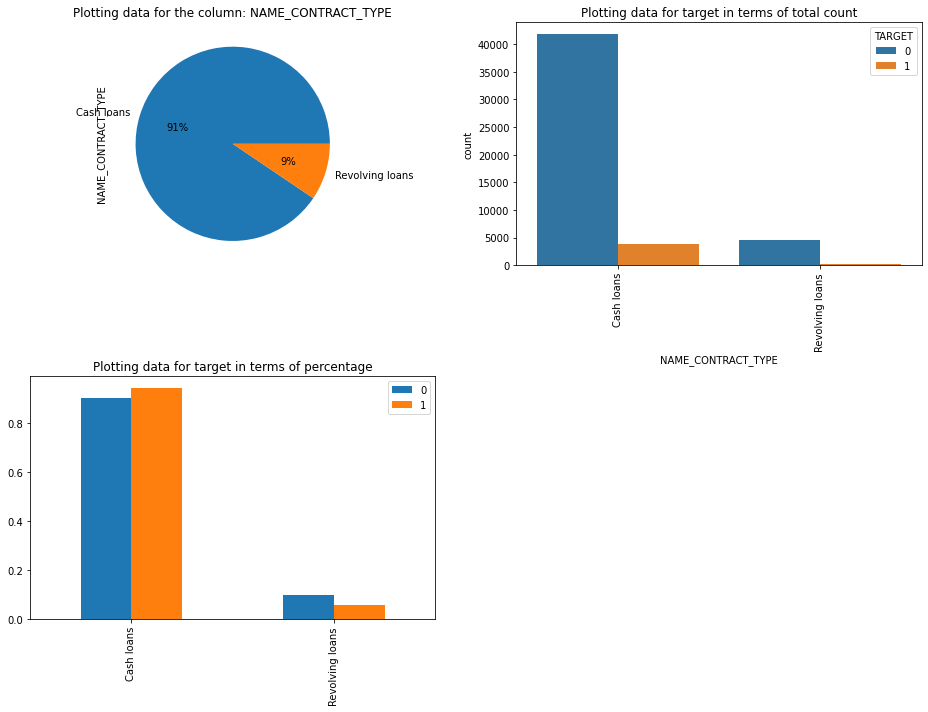

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


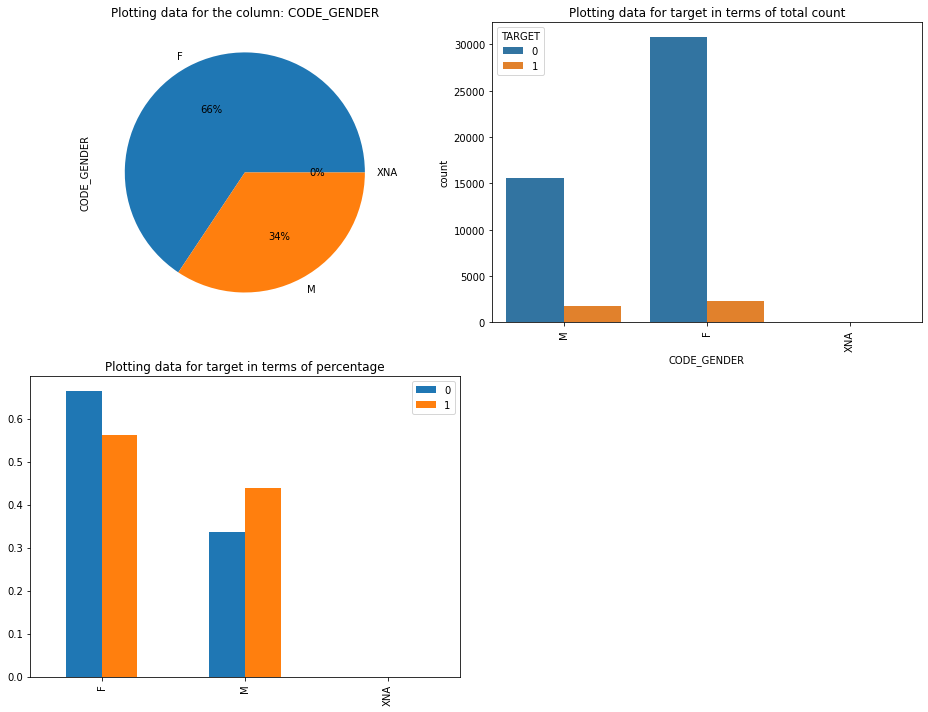

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


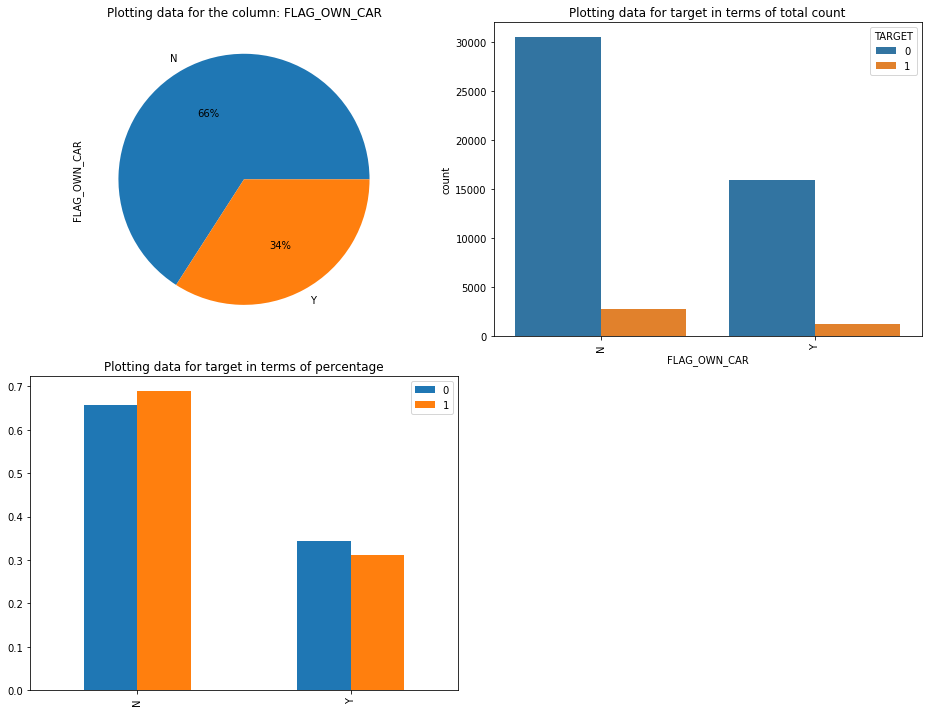

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


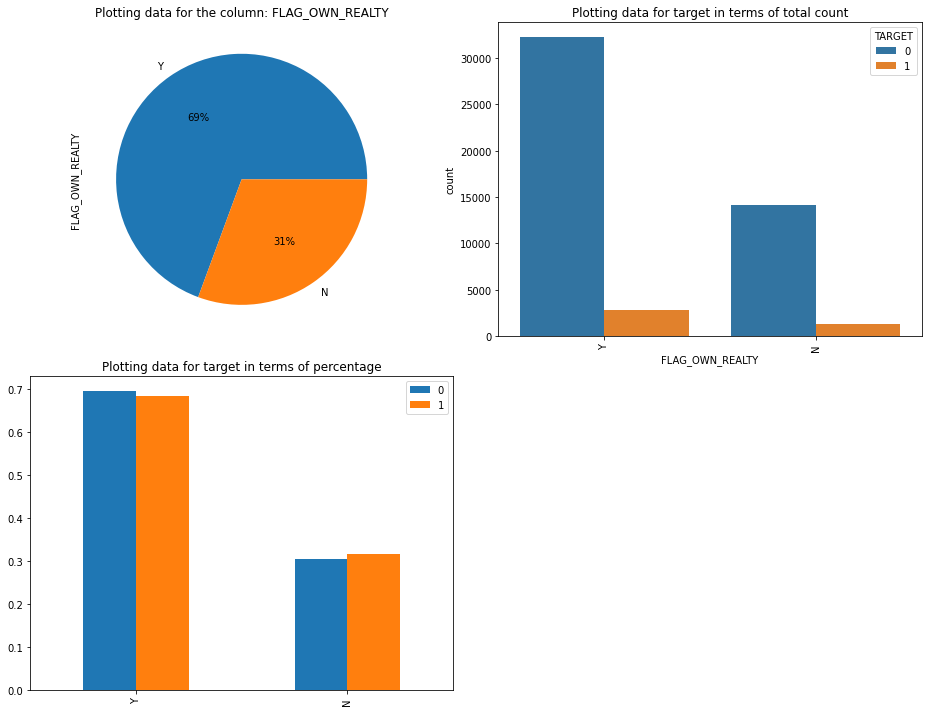

----------------------------------------------------------------------------------------------
Plotting  NAME_TYPE_SUITE


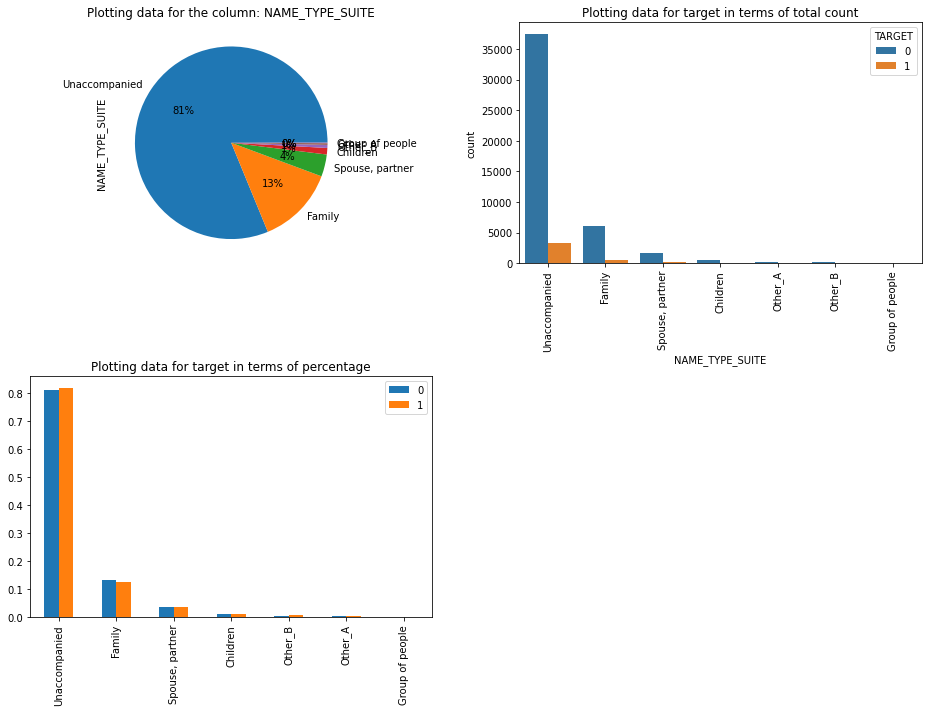

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


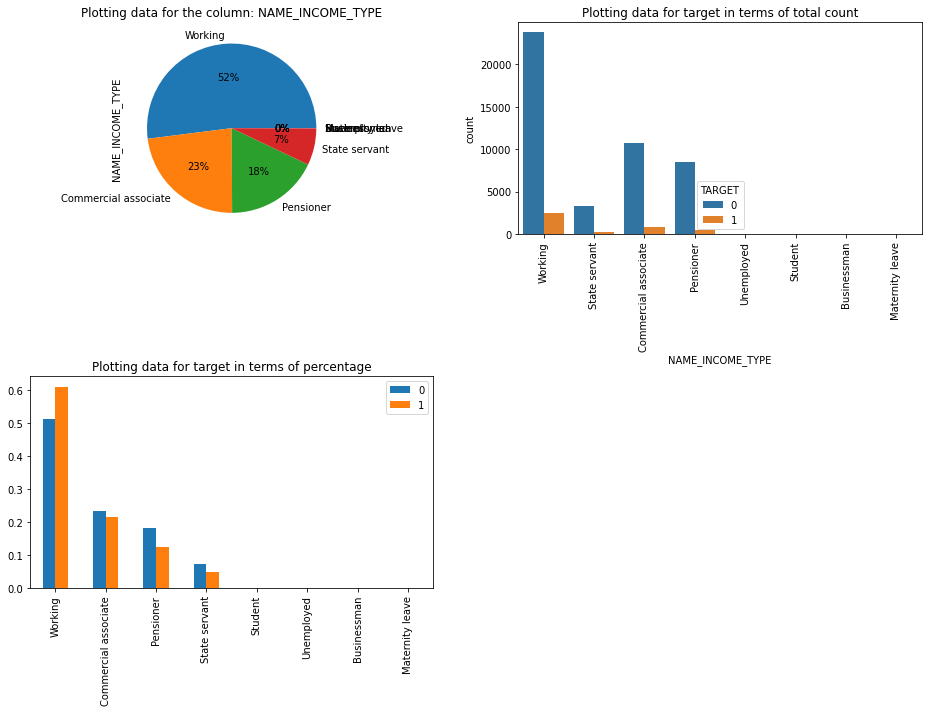

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


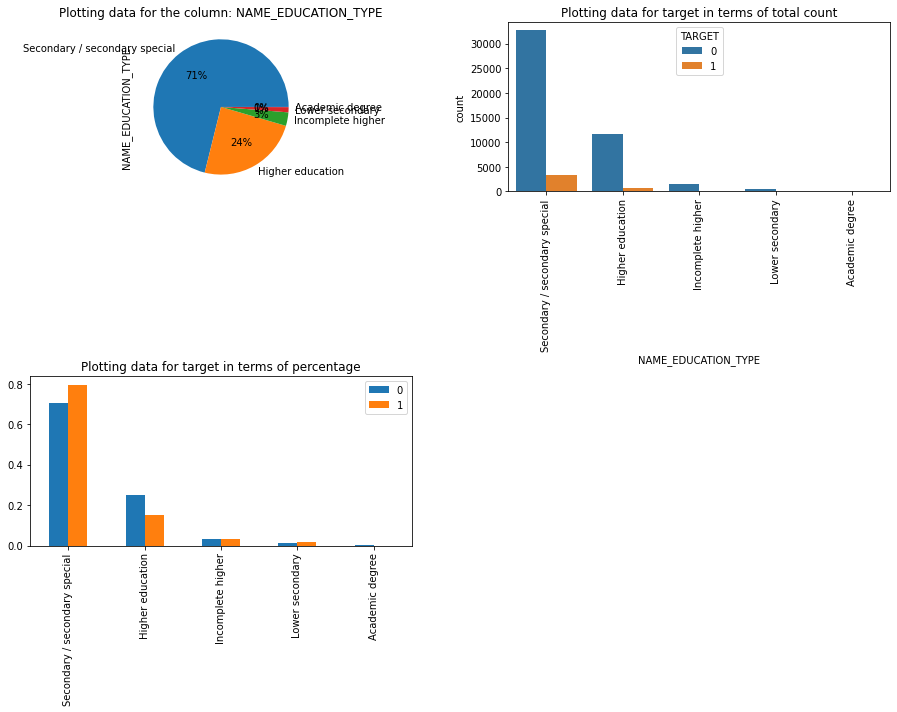

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


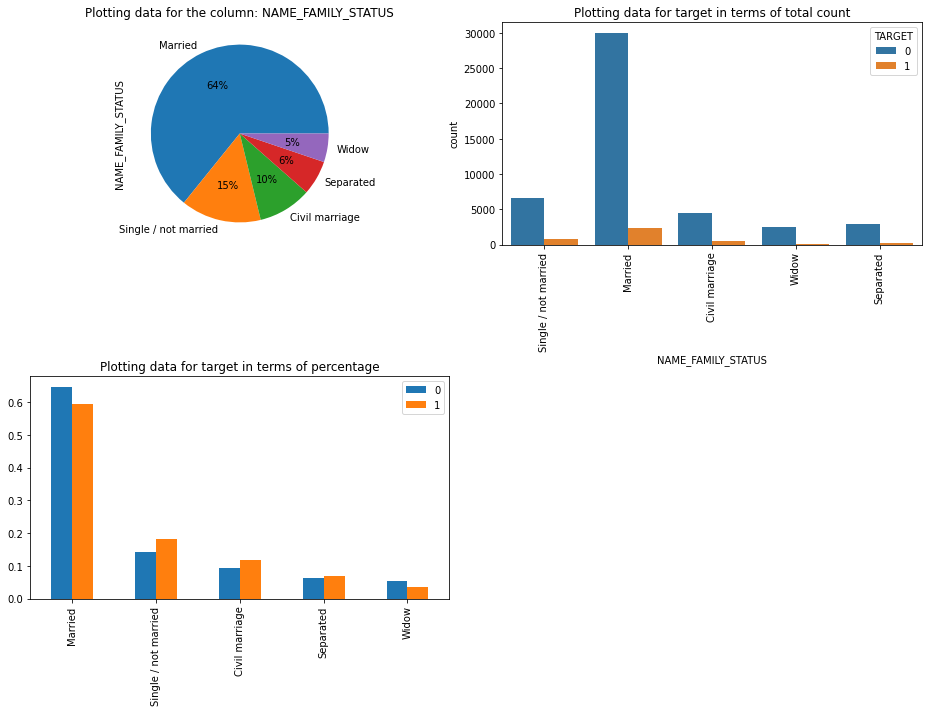

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


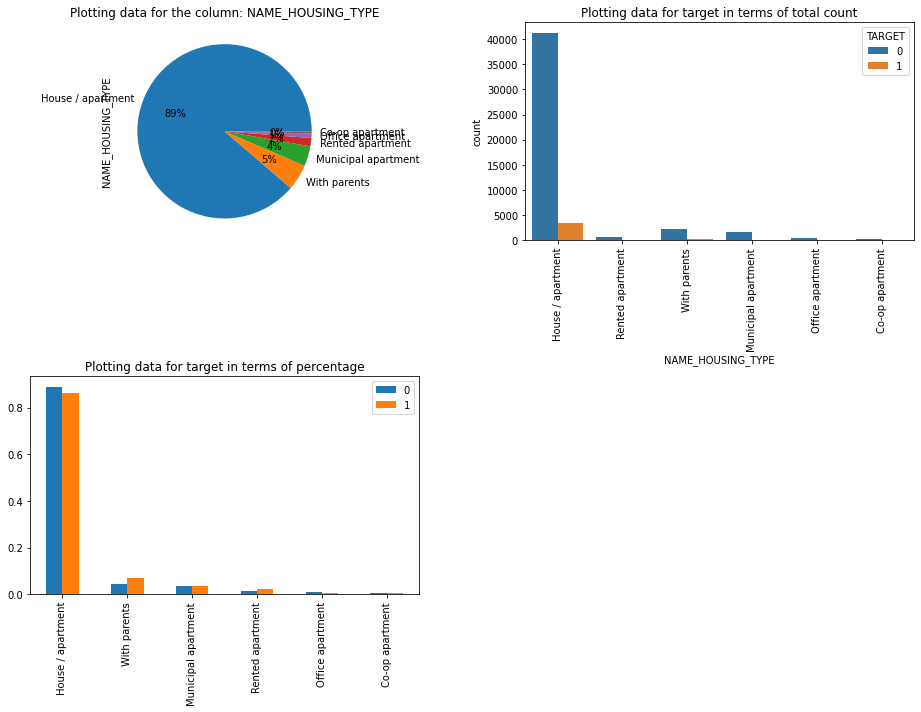

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


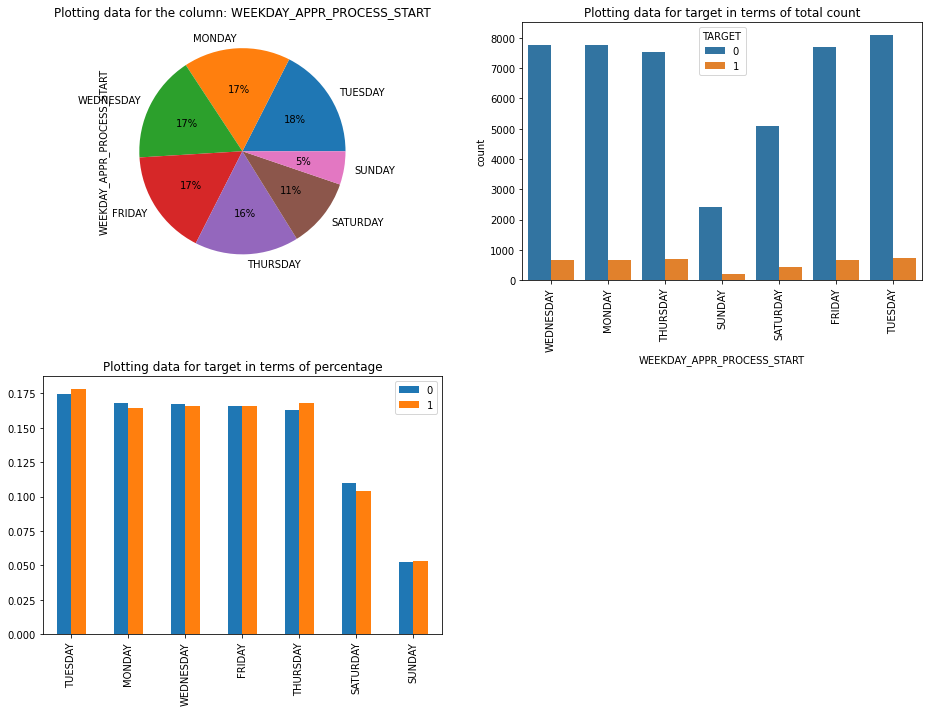

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


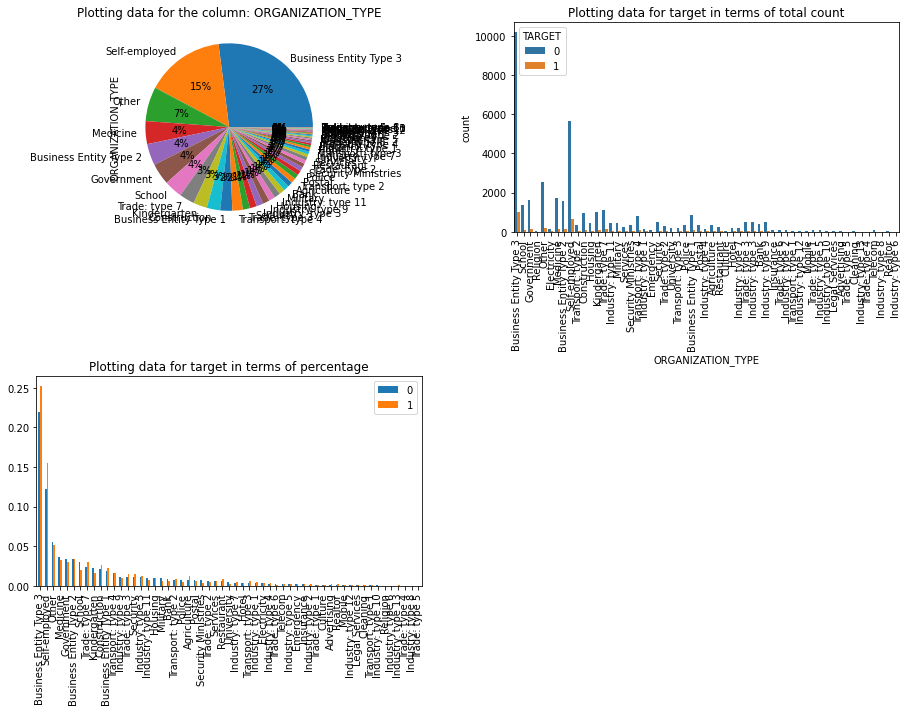

----------------------------------------------------------------------------------------------


In [ ]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(app2, app2_target0, app2_target1, column)
    print('----------------------------------------------------------------------------------------------')

The variable which seems to be important are:
*   **CODE_GENDER**: Less number of males(hist plot) take loan but the defaulters are higher in case of males(dist plot).
*   **NAME_INCOME_TYPE**: Pensioner defaulter is lower than non-defaulter.
*   **NAME_EDUCATION_TYPE**: Most client take loan for secondary education followed by higher education. But the defualt rate in secondary education is much high and for higher education is much low.
*   **NAME_FAMILY_STATUS**: Most married people apply for loan, and mostly they are not defaulters. Single and civil marriage turns out to be more defaulter.







The revolving loans are lesser in Target : 1 for defaulters which means they have less chance to make a financial impact on the business.

There is no impact of NAME_TYPE_SUITE on defaulters as the propotion is same 10:1 which is same as population propotion as calculated in the Data Imbalance.

NAME_HOUSING_TYPE: Living in Rented apartments and those living with parents have higher default rate as they have higher proportion in the Defaulted population(Target 1) as compared to non defaulted(Target 0) population.


***Ordered Categorical Analysis***

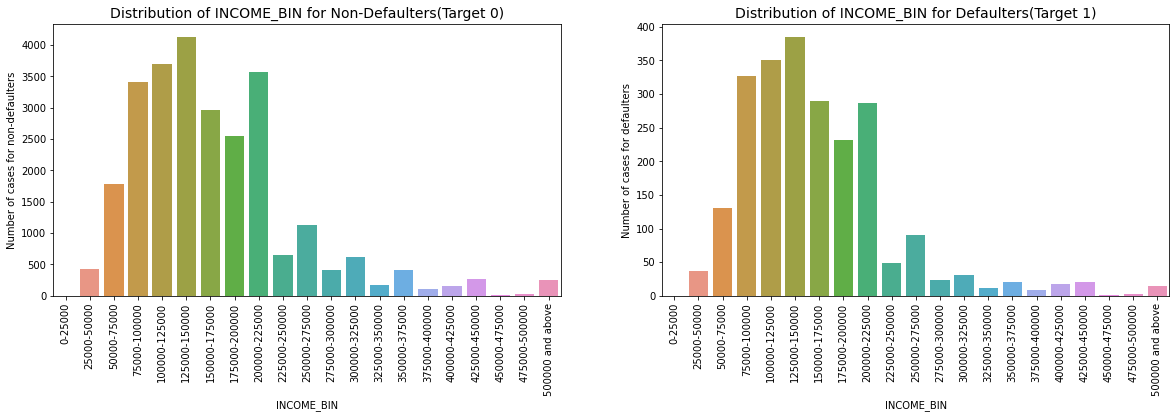

In [ ]:
#ordered Category analysis
count_plot_dfs("INCOME_BIN")

No effect of income on defaulters as the proportion is same 10:1 which is same as population proportion as calculated in the Data Imbalance.

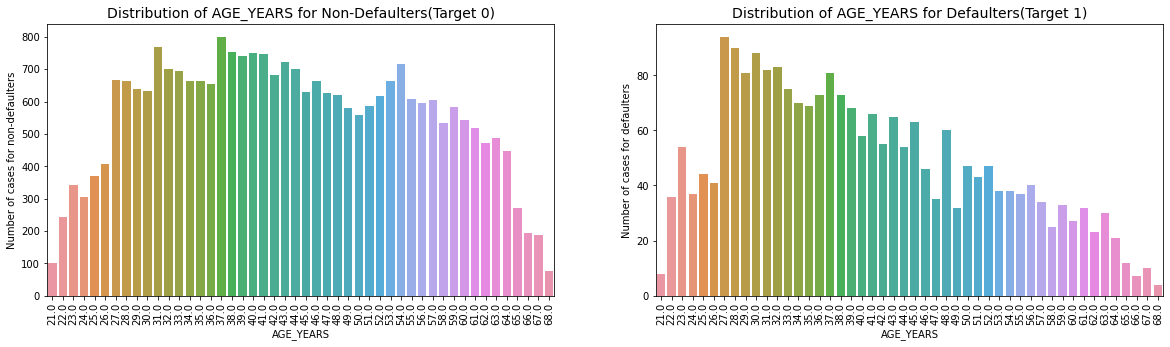

In [ ]:
count_plot_dfs("AGE_YEARS")

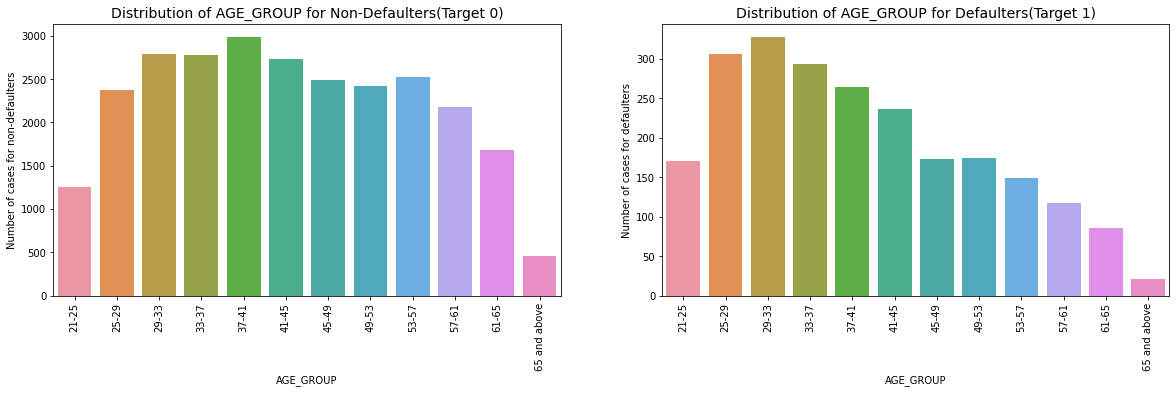

In [ ]:
count_plot_dfs("AGE_GROUP")

Adults age between 25-45 have higher tendency to be defaulters.

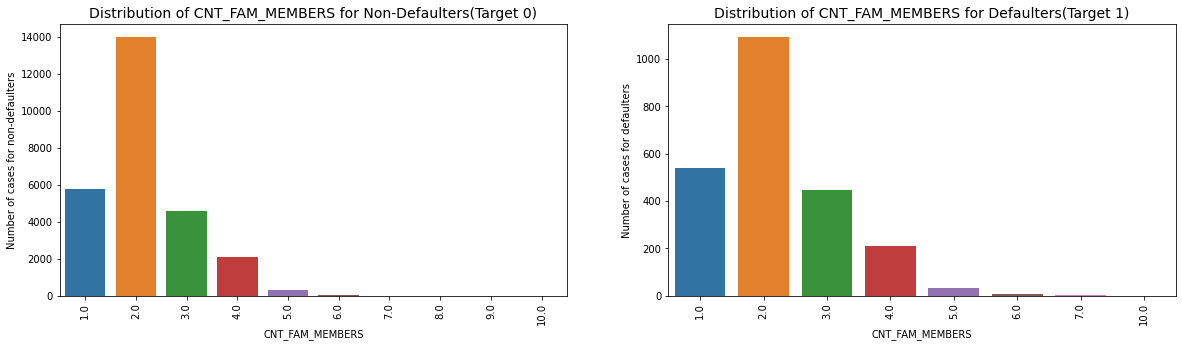

In [ ]:
count_plot_dfs("CNT_FAM_MEMBERS")

No. of family members has no impact, as proportion is same as mentioned above.

Cash loans         0.900538
Revolving loans    0.099462
Name: NAME_CONTRACT_TYPE, dtype: float64
Cash loans         0.945064
Revolving loans    0.054936
Name: NAME_CONTRACT_TYPE, dtype: float64


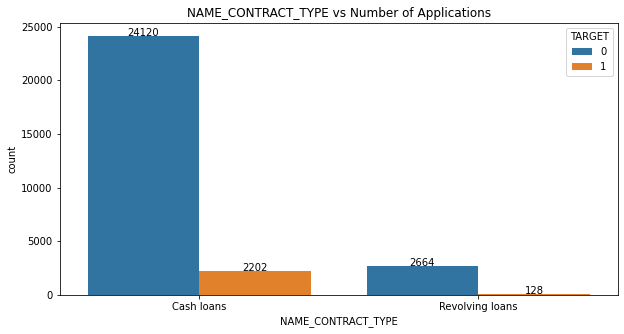

In [ ]:
print(app2_target0.NAME_CONTRACT_TYPE.value_counts(normalize=True))
print(app2_target1.NAME_CONTRACT_TYPE.value_counts(normalize=True))
categorical_univariate_countplot('NAME_CONTRACT_TYPE')


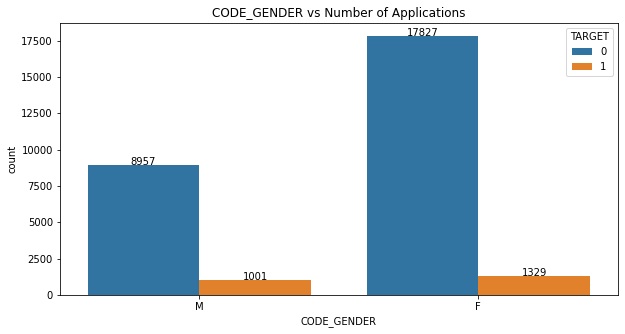

In [ ]:
categorical_univariate_countplot('CODE_GENDER')

2.0    0.748731
3.0    0.135379
1.0    0.115890
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
2.0    0.733362
3.0    0.205668
1.0    0.060970
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


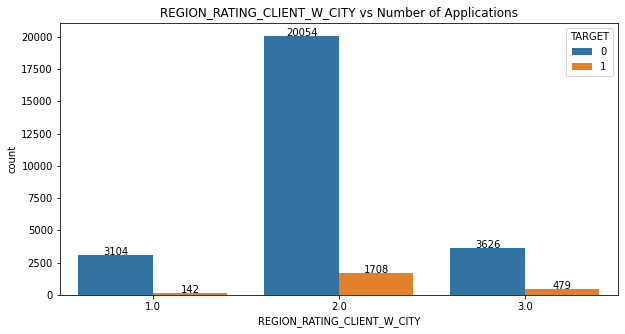

In [ ]:
print(app2_target0.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True))
print(app2_target1.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True))
categorical_univariate_countplot('REGION_RATING_CLIENT_W_CITY')


There are higher number of Payment Difficulties in category 2 cities compared to All other cases.

***Numerical Columns***

### Correlation for numerical columns

In [ ]:
# Target 0
num_cols=list(app2_target0.select_dtypes('int64').columns)
float_cols=list(app2_target0.select_dtypes('float').columns)

cols_all = num_cols + float_cols

app2_target0_num = app2_target0[cols_all]
app2_target0_corr = app2_target0_num.corr()
round(app2_target0_corr, 3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
SK_ID_CURR,1.000,NaN,0.002,0.006,0.002,0.004,0.001,-0.002,0.005,0.006,-0.001,0.002,-0.001,-0.006,-0.007,-0.012,-0.009,0.003,-0.001,0.004,0.004,-0.007,-0.000,-0.002,-0.003,0.006,-0.003,-0.003,-0.000,-0.001,0.006,-0.005,0.006,-0.008,0.007,0.007,0.001,-0.002,0.000,0.005,0.014,0.002,0.000,0.010,0.001,NaN,0.010,0.010,0.008,0.006,0.003,0.011,0.011,0.002,-0.001,-0.002,0.003,0.000,-0.005,-0.010,0.000,0.005
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.002,NaN,1.000,0.036,0.009,0.027,0.004,-0.025,-0.338,-0.244,-0.186,0.032,0.004,0.243,0.051,-0.003,-0.030,0.026,0.879,0.020,0.018,-0.006,-0.013,0.006,0.015,0.024,0.071,0.065,-0.018,-0.047,0.009,-0.002,0.009,-0.001,0.005,0.014,0.055,-0.008,-0.019,-0.151,-0.003,0.066,-0.010,-0.004,-0.005,NaN,0.003,-0.004,0.016,0.018,-0.006,-0.004,-0.000,0.003,0.003,-0.000,-0.001,0.003,-0.015,-0.021,-0.039,-0.338
AMT_INCOME_TOTAL,0.006,NaN,0.036,1.000,0.382,0.456,0.389,0.180,-0.075,-0.158,-0.061,-0.029,0.003,0.159,-0.041,-0.014,0.002,0.088,0.041,-0.207,-0.221,0.086,0.071,0.159,0.148,0.013,0.018,0.019,0.154,-0.077,-0.029,-0.036,-0.029,-0.037,0.038,-0.002,-0.045,-0.005,0.019,-0.109,0.010,0.180,0.047,0.001,0.018,NaN,0.059,0.050,0.037,0.022,0.010,0.001,0.000,-0.004,-0.007,0.009,0.011,0.012,0.081,0.005,0.021,-0.075
AMT_CREDIT,0.002,NaN,0.009,0.382,1.000,0.775,0.987,0.093,0.051,-0.071,-0.010,0.007,0.005,0.072,-0.020,0.030,0.017,0.014,0.068,-0.103,-0.112,0.056,0.031,0.060,0.058,-0.018,-0.014,0.003,0.135,0.037,0.003,-0.009,0.003,-0.014,0.066,0.013,0.099,-0.002,-0.004,-0.049,-0.005,0.090,0.034,-0.006,0.052,NaN,0.045,0.043,0.032,0.066,0.008,0.026,0.022,0.026,-0.017,-0.002,0.016,0.010,0.059,0.021,-0.039,0.051
AMT_ANNUITY,0.004,NaN,0.027,0.456,0.775,1.000,0.780,0.117,-0.012,-0.109,-0.036,-0.010,0.001,0.110,-0.027,0.028,0.004,0.069,0.078,-0.131,-0.144,0.052,0.048,0.090,0.081,-0.005,0.002,0.010,0.132,0.020,-0.007,-0.019,-0.006,-0.022,0.060,0.006,0.099,-0.005,-0.001,-0.069,-0.004,0.137,0.040,-0.007,0.018,NaN,0.024,0.043,0.007,0.010,0.003,-0.015,0.006,0.008,-0.019,0.007,0.012,0.026,0.036,0.008,-0.005,-0.012
AMT_GOODS_PRICE,0.001,NaN,0.004,0.389,0.987,0.780,1.000,0.097,0.049,-0.068,-0.014,0.009,0.005,0.070,0.002,0.027,0.033,0.013,0.065,-0.106,-0.114,0.064,0.035,0.063,0.059,-0.018,-0.015,0.002,0.143,0.041,0.002,-0.011,0.002,-0.016,0.069,0.015,0.078,-0.003,0.003,-0.053,-0.004,0.087,0.035,-0.006,0.060,NaN,0.046,0.042,0.032,0.061,0.008,0.025,0.021,0.026,-0.014,-0.001,0.016,0.010,0.060,0.021,-0.043,0.049
REGION_POPULATION_RELATIVE,-0.002,NaN,-0.025,0.180,0.093,0.117,0.097,1.000,0.032,-0.011,0.068,0.002,0.005,0.012,-0.015,-0.005,0.095,0.032,-0.023,-0.543,-0.540,0.166,-0.004,0.057,0.078,-0

In [ ]:
vertical_corr = app2_target0_corr.unstack()
vertical_corr.sort_values(ascending=False).drop_duplicates()[:50]

AGE_YEARS                    AGE_YEARS                      1.000000
DAYS_BIRTH                   AGE_YEARS                      0.999710
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998426
AMT_CREDIT                   AMT_GOODS_PRICE                0.986941
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.951927
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.879117
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.853874
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.846493
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.821500
AMT_ANNUITY                  AMT_GOODS_PRICE                0.780233
AMT_CREDIT                   AMT_ANNUITY                    0.774920
DAYS_EMPLOYED                DAYS_BIRTH                     0.625024
                             AGE_YEARS                      0.624926
FLAG_DOCUMENT_6              DAYS_EMPLOYED                  0.590517
REG_REGION_NOT_LIVE_REGION   REG_R

In [ ]:
num_cols=list(app2_target1.select_dtypes('int64').columns)
float_cols=list(app2_target1.select_dtypes('float').columns)

cols_all = num_cols + float_cols

app2_target1_num = app2_target1[cols_all]
app2_target1_corr = app2_target1_num.corr()
round(app2_target1_corr, 3)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
SK_ID_CURR,1.000,NaN,-0.025,-0.005,0.041,0.023,0.038,-0.015,0.040,0.020,0.025,0.047,NaN,-0.020,0.019,0.017,-0.002,-0.008,-0.023,0.015,0.015,-0.001,-0.012,-0.007,-0.004,0.002,-0.002,0.008,0.021,0.062,0.004,-0.016,0.005,-0.001,0.039,NaN,0.020,NaN,0.008,-0.011,NaN,-0.022,0.014,NaN,-0.007,NaN,-0.032,-0.017,NaN,-0.047,0.003,-0.019,0.013,0.004,NaN,-0.017,0.002,-0.009,0.017,-0.005,0.030,0.040
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.025,NaN,1.000,0.013,0.010,0.044,-0.001,-0.016,-0.258,-0.193,-0.167,0.037,NaN,0.193,0.053,-0.000,-0.010,0.006,0.893,0.041,0.042,-0.007,-0.019,0.001,0.009,-0.004,0.051,0.074,-0.021,-0.012,0.022,-0.033,0.020,-0.032,-0.008,NaN,0.039,NaN,-0.016,-0.117,NaN,0.025,0.001,NaN,0.001,NaN,-0.018,-0.013,NaN,-0.016,-0.013,0.029,-0.018,-0.013,NaN,0.006,-0.050,-0.037,-0.035,-0.006,-0.022,-0.258
AMT_INCOME_TOTAL,-0.005,NaN,0.013,1.000,0.010,0.012,0.007,-0.011,-0.011,-0.012,0.014,0.012,NaN,0.012,-0.013,-0.003,-0.011,-0.002,0.017,-0.012,-0.012,0.017,-0.000,-0.001,-0.000,-0.007,-0.013,-0.011,-0.025,-0.029,-0.014,-0.009,-0.014,-0.008,-0.019,NaN,0.011,NaN,-0.003,-0.009,NaN,-0.001,0.001,NaN,-0.001,NaN,0.000,0.002,NaN,-0.001,-0.000,-0.003,-0.001,-0.000,NaN,-0.002,-0.003,-0.003,-0.005,-0.009,-0.011,-0.011
AMT_CREDIT,0.041,NaN,0.010,0.010,1.000,0.752,0.983,0.069,0.166,0.012,0.043,0.038,NaN,-0.010,-0.048,0.032,0.039,-0.007,0.064,-0.029,-0.043,0.047,-0.004,0.003,0.017,-0.058,-0.054,-0.022,0.118,0.100,0.043,-0.021,0.044,-0.033,0.119,NaN,0.033,NaN,-0.029,0.015,NaN,0.058,-0.014,NaN,0.050,NaN,0.001,0.035,NaN,0.050,0.022,0.022,0.050,0.024,NaN,0.013,-0.018,0.024,0.107,-0.021,-0.028,0.165
AMT_ANNUITY,0.023,NaN,0.044,0.012,0.752,1.000,0.753,0.071,0.022,-0.089,-0.010,0.020,NaN,0.090,-0.042,0.041,-0.004,0.096,0.086,-0.060,-0.078,0.035,0.026,0.059,0.067,-0.022,-0.003,0.016,0.105,0.034,0.027,-0.035,0.027,-0.045,0.101,NaN,0.066,NaN,-0.022,-0.056,NaN,0.140,0.006,NaN,-0.003,NaN,0.002,0.009,NaN,-0.007,0.004,-0.033,0.018,-0.003,NaN,0.038,-0.026,0.067,0.094,-0.003,-0.002,0.021
AMT_GOODS_PRICE,0.038,NaN,-0.001,0.007,0.983,0.753,1.000,0.074,0.165,0.015,0.043,0.048,NaN,-0.013,-0.024,0.028,0.054,-0.004,0.057,-0.034,-0.045,0.058,-0.006,0.005,0.018,-0.060,-0.058,-0.027,0.133,0.097,0.042,-0.017,0.043,-0.027,0.126,NaN,0.014,NaN,-0.020,0.007,NaN,0.057,-0.015,NaN,0.046,NaN,0.006,0.033,NaN,0.042,0.029,0.018,0.051,0.031,NaN,0.011,-0.015,0.022,0.102,-0.026,-0.035,0.164
REGION_POPULATION_RELATIVE,-0.015,NaN,-0.016,-0.011,0.069,0.071,0.074,1.000,0.010,0.012,0.034,0.001,NaN,-0.012,-0.006,0.021,0.090,0.078,-0.006,-0.446,-0.445,0.168,0.004,0.014,0.046,-0.033,-0.028,-0.009,0.138,-0.027,0.022,0.021,0.024,0.021,0.046,NaN,-

Get top K number of correlation variables and considering the impactful ones.

In [ ]:
vertical_corr_1 = app2_target1_corr.unstack()
vertical_corr_1.sort_values(ascending=False).drop_duplicates()[:50]


AGE_YEARS                    AGE_YEARS                      1.000000
DAYS_BIRTH                   AGE_YEARS                      0.999678
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998512
AMT_GOODS_PRICE              AMT_CREDIT                     0.982793
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.949616
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.892509
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.891282
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.795511
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.781583
AMT_ANNUITY                  AMT_GOODS_PRICE                0.752719
                             AMT_CREDIT                     0.751803
DAYS_EMPLOYED                FLAG_DOCUMENT_6                0.599528
DAYS_BIRTH                   DAYS_EMPLOYED                  0.591417
DAYS_EMPLOYED                AGE_YEARS                      0.591339
REG_REGION_NOT_LIVE_REGION   REG_R

The top few correlation variables both for target 0 and target 1 are-



```
OBS_30_CNT_SOCIAL_CIRCLE - OBS_60_CNT_SOCIAL_CIRCLE 
AMT_GOODS_PRICE - AMT_CREDIT
REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
CNT_CHILDREN - CNT_FAM_MEMBERS 
DEF_30_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE
AMT_ANNUITY - AMT_GOODS_PRICE
AMT_CREDIT - AMT_ANNUITY  
```



In [ ]:
colu = ["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE","AMT_GOODS_PRICE" ,"AMT_CREDIT" , "REGION_RATING_CLIENT_W_CITY" , "REGION_RATING_CLIENT",
"CNT_CHILDREN", "CNT_FAM_MEMBERS" ,
"DEF_30_CNT_SOCIAL_CIRCLE" , "DEF_60_CNT_SOCIAL_CIRCLE",
"AMT_ANNUITY", "AMT_GOODS_PRICE",
"AMT_CREDIT" , "AMT_ANNUITY" ]
vertical_corr_0= app2_target0_num[colu]
vertical_corr_0_matrix = vertical_corr_0.corr()
vertical_corr_0_matrix

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_CREDIT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY
OBS_30_CNT_SOCIAL_CIRCLE,1.000000,0.998426,0.002360,0.002722,0.033477,0.033959,0.009320,0.021547,0.306441,0.227239,-0.006690,0.002360,0.002722,-0.006690
OBS_60_CNT_SOCIAL_CIRCLE,0.998426,1.000000,0.002387,0.002791,0.033055,0.033646,0.009426,0.021850,0.308564,0.229175,-0.006496,0.002387,0.002791,-0.006496
AMT_GOODS_PRICE,0.002360,0.002387,1.000000,0.986941,-0.113664,-0.106245,0.003816,0.064854,-0.011242,-0.015814,0.780233,1.000000,0.986941,0.780233
AMT_CREDIT,0.002722,0.002791,0.986941,1.000000,-0.111705,-0.103390,0.008825,0.067887,-0.009371,-0.013793,0.774920,0.986941,1.000000,0.774920
REGION_RATING_CLIENT_W_CITY,0.033477,0.033055,-0.113664,-0.111705,1.000000,0.951927,0.018298,0.021212,0.007783,0.011010,-0.143678,-0.113664,-0.111705,-0.143678
REGION_RATING_CLIENT,0.033959,0.033646,-0.106245,-0.103390,0.951927,1.000000,0.020082,0.021789,0.006078,0.011177,-0.131360,-0.106245,-0.103390,-0.131360
CNT_CHILDREN,0.009320,0.009426,0.003816,0.008825,0.018298,0.020082,1.000000,0.879117,-0.001816,-0.001377,0.026924,0.003816,0.008825,0.026924
CNT_FAM_MEMBERS,0.021547,0.021850,0.064854,0.067887,0.021212,0.021789,0.879117,1.000000,-0.001224,-0.002515,0.078404,0.064854,0.067887,0.078404
DEF_30_CNT_SOCIAL_CIRCLE,0.306441,0.308564,-0.011242,-0.009371,0.007783,0.006078,-0.001816,-0.001224,1.000000,0.853874,-0.018667,-0.011242,-0.009371,-0.018667
DEF_60_CNT_SOCIAL_CIRCLE,0.227239,0.229175,-0.015814,-0.013793,0.011010,0.011177,-0.001377,-0.002515,0.853874,1.000000,-0.022121,-0.015814,-0.013793,-0.022121


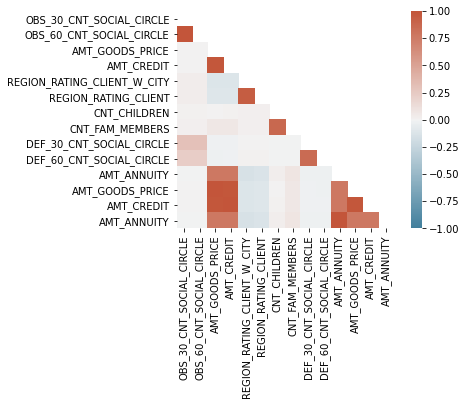

In [ ]:
mask = np.triu(np.ones_like(vertical_corr_0_matrix, dtype=np.bool))
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(vertical_corr_0_matrix, mask = mask,  cmap=cmap,vmin= -1, vmax=1, center=0,
            square=True)

In [ ]:
vertical_corr_1_= app2_target1_num[colu]
vertical_corr_1_matrix = vertical_corr_1_.corr()
vertical_corr_1_matrix

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_GOODS_PRICE,AMT_CREDIT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_CHILDREN,CNT_FAM_MEMBERS,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY
OBS_30_CNT_SOCIAL_CIRCLE,1.000000,0.998512,0.041985,0.043405,0.006186,0.012741,0.022258,0.042848,0.381307,0.311925,0.026613,0.041985,0.043405,0.026613
OBS_60_CNT_SOCIAL_CIRCLE,0.998512,1.000000,0.042760,0.044212,0.005123,0.011329,0.020172,0.040883,0.383079,0.314188,0.027126,0.042760,0.044212,0.027126
AMT_GOODS_PRICE,0.041985,0.042760,1.000000,0.982793,-0.045229,-0.033929,-0.001055,0.056665,-0.017027,-0.027479,0.752719,1.000000,0.982793,0.752719
AMT_CREDIT,0.043405,0.044212,0.982793,1.000000,-0.043484,-0.028899,0.009523,0.063783,-0.021003,-0.032953,0.751803,0.982793,1.000000,0.751803
REGION_RATING_CLIENT_W_CITY,0.006186,0.005123,-0.045229,-0.043484,1.000000,0.949616,0.041969,0.044008,0.009882,-0.003677,-0.077980,-0.045229,-0.043484,-0.077980
REGION_RATING_CLIENT,0.012741,0.011329,-0.033929,-0.028899,0.949616,1.000000,0.040732,0.043009,0.006010,-0.008728,-0.059714,-0.033929,-0.028899,-0.059714
CNT_CHILDREN,0.022258,0.020172,-0.001055,0.009523,0.041969,0.040732,1.000000,0.892509,-0.033493,-0.031524,0.043506,-0.001055,0.009523,0.043506
CNT_FAM_MEMBERS,0.042848,0.040883,0.056665,0.063783,0.044008,0.043009,0.892509,1.000000,-0.028717,-0.026093,0.085814,0.056665,0.063783,0.085814
DEF_30_CNT_SOCIAL_CIRCLE,0.381307,0.383079,-0.017027,-0.021003,0.009882,0.006010,-0.033493,-0.028717,1.000000,0.891282,-0.035274,-0.017027,-0.021003,-0.035274
DEF_60_CNT_SOCIAL_CIRCLE,0.311925,0.314188,-0.027479,-0.032953,-0.003677,-0.008728,-0.031524,-0.026093,0.891282,1.000000,-0.044514,-0.027479,-0.032953,-0.044514


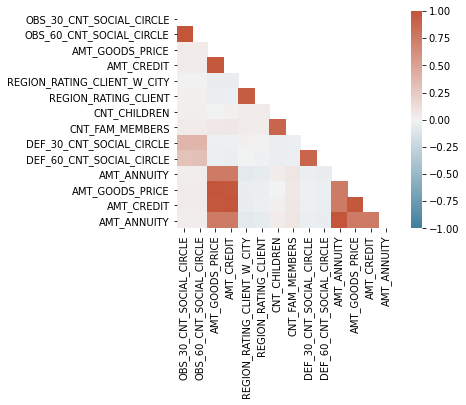

In [ ]:
mask = np.triu(np.ones_like(vertical_corr_1_matrix, dtype=np.bool))
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(vertical_corr_1_matrix, mask = mask,  cmap=cmap,vmin= -1, vmax=1, center=0,
            square=True)

###Bivariate Analysis of numerical variables as per correlations.

In [ ]:
def plot_bivar_cont(row, col):
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  sns.scatterplot(x = row, y = col, data=app2_target0)
  plt.title('TARGET=0')
  plt.xlabel(row)
  plt.xticks(rotation=90)
  plt.subplot(1, 2, 2)
  sns.scatterplot(x = row, y = col, data=app2_target1)
  plt.title('TARGET=1')
  plt.xlabel(row)
  plt.xticks(rotation=90)
  plt.show()

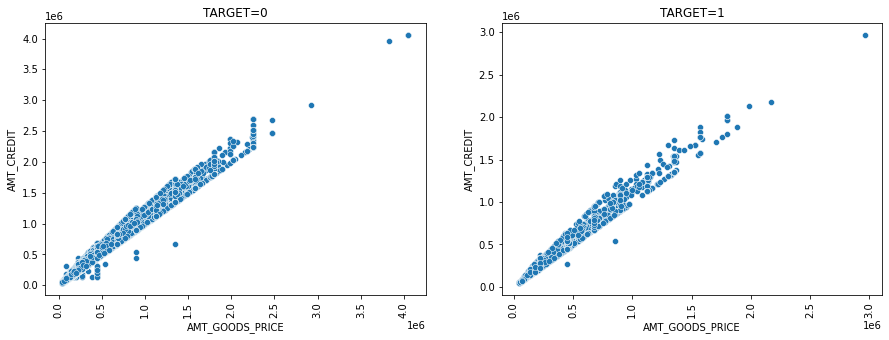

In [ ]:
plot_bivar_cont('AMT_GOODS_PRICE', 'AMT_CREDIT')

Defaulters are less if price of good is upto 500k and amount credit is also less than 500k

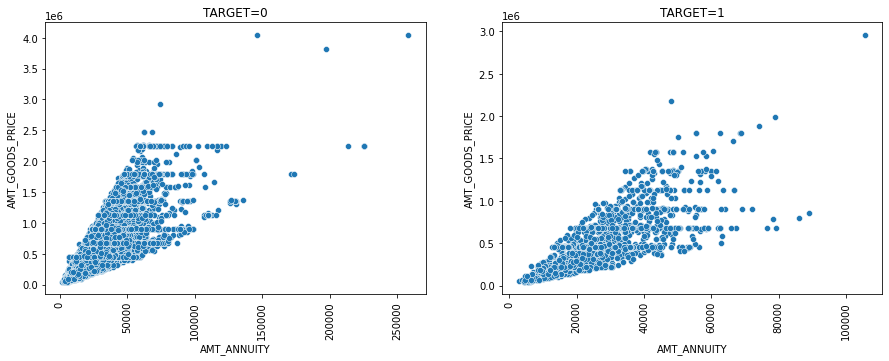

In [ ]:
plot_bivar_cont('AMT_ANNUITY', 'AMT_GOODS_PRICE')

Nothing much to analyse here.

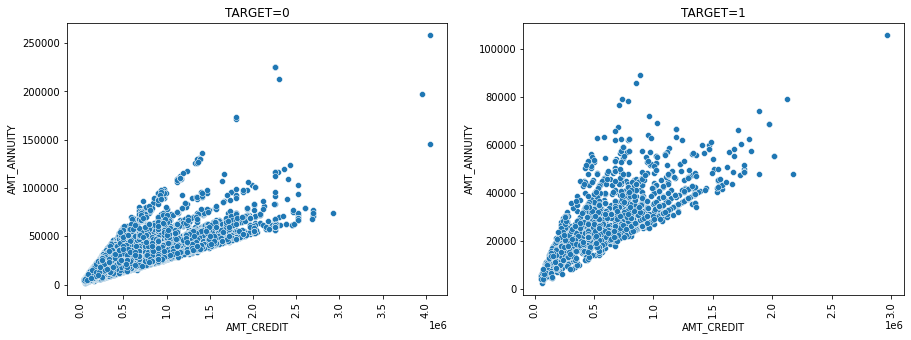

In [ ]:
plot_bivar_cont('AMT_CREDIT', 'AMT_ANNUITY')

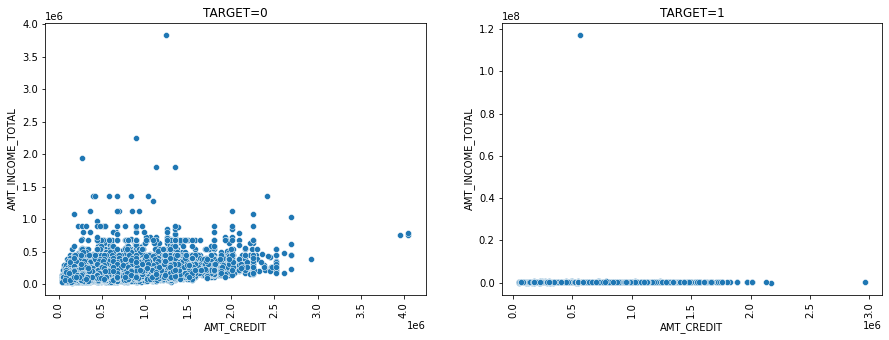

In [ ]:
plot_bivar_cont('AMT_CREDIT', 'AMT_INCOME_TOTAL')

###***Previous Data Analysis***

In [ ]:
prev.shape

(16973, 37)

In [ ]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16973 entries, 0 to 16972
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   16973 non-null  int64  
 1   SK_ID_CURR                   16973 non-null  int64  
 2   NAME_CONTRACT_TYPE           16973 non-null  object 
 3   AMT_ANNUITY                  13488 non-null  float64
 4   AMT_APPLICATION              16973 non-null  float64
 5   AMT_CREDIT                   16973 non-null  float64
 6   AMT_DOWN_PAYMENT             8702 non-null   float64
 7   AMT_GOODS_PRICE              13461 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   16973 non-null  object 
 9   HOUR_APPR_PROCESS_START      16973 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  16972 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       16972 non-null  float64
 12  RATE_DOWN_PAYMENT            8702 non-null   float64
 13  RATE_INTEREST_PR

In [ ]:
prev.dtypes.value_counts()

float64    17
object     16
int64       4
dtype: int64

In [ ]:
(100*prev.isnull().sum()/len(prev)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    21.21
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               50.70
AMT_GOODS_PRICE                21.58
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              50.70
RATE_INTEREST_PRIMARY          99.67
RATE_INTEREST_PRIVILEGED       99.67
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                48.58
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [ ]:
prev = prev.loc[:, prev.isnull().mean() <= .20]

In [ ]:
(100*prev.isnull().sum()/len(prev)).round(2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.01
NFLAG_LAST_APPL_IN_DAY         0.01
NAME_CASH_LOAN_PURPOSE         0.01
NAME_CONTRACT_STATUS           0.01
DAYS_DECISION                  0.01
NAME_PAYMENT_TYPE              0.01
CODE_REJECT_REASON             0.01
NAME_CLIENT_TYPE               0.01
NAME_GOODS_CATEGORY            0.01
NAME_PORTFOLIO                 0.01
NAME_PRODUCT_TYPE              0.01
CHANNEL_TYPE                   0.01
SELLERPLACE_AREA               0.01
NAME_SELLER_INDUSTRY           0.01
NAME_YIELD_GROUP               0.01
PRODUCT_COMBINATION            0.02
dtype: float64

In [ ]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16973 entries, 0 to 16972
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   16973 non-null  int64  
 1   SK_ID_CURR                   16973 non-null  int64  
 2   NAME_CONTRACT_TYPE           16973 non-null  object 
 3   AMT_APPLICATION              16973 non-null  float64
 4   AMT_CREDIT                   16973 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   16973 non-null  object 
 6   HOUR_APPR_PROCESS_START      16973 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  16972 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       16972 non-null  float64
 9   NAME_CASH_LOAN_PURPOSE       16972 non-null  object 
 10  NAME_CONTRACT_STATUS         16972 non-null  object 
 11  DAYS_DECISION                16972 non-null  float64
 12  NAME_PAYMENT_TYPE            16972 non-null  object 
 13  CODE_REJECT_REAS

In [ ]:
prev.dtypes.value_counts()

object     15
float64     5
int64       3
dtype: int64

In [ ]:
prev = prev.loc[:, prev.isnull().mean() <= .40]

In [ ]:
prev = prev.loc[0:120000]
prev.shape

(59770, 23)

In [ ]:
merged = pd.merge(app, prev, how='left', on=['SK_ID_CURR'])

In [ ]:
merged.shape

(223695, 144)

In [ ]:
merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY',
       ...
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object', length=144)

In [ ]:
ptrain_0 = merged.loc[merged['TARGET'] == 0]
ptrain_1 = merged.loc[merged['TARGET'] == 1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

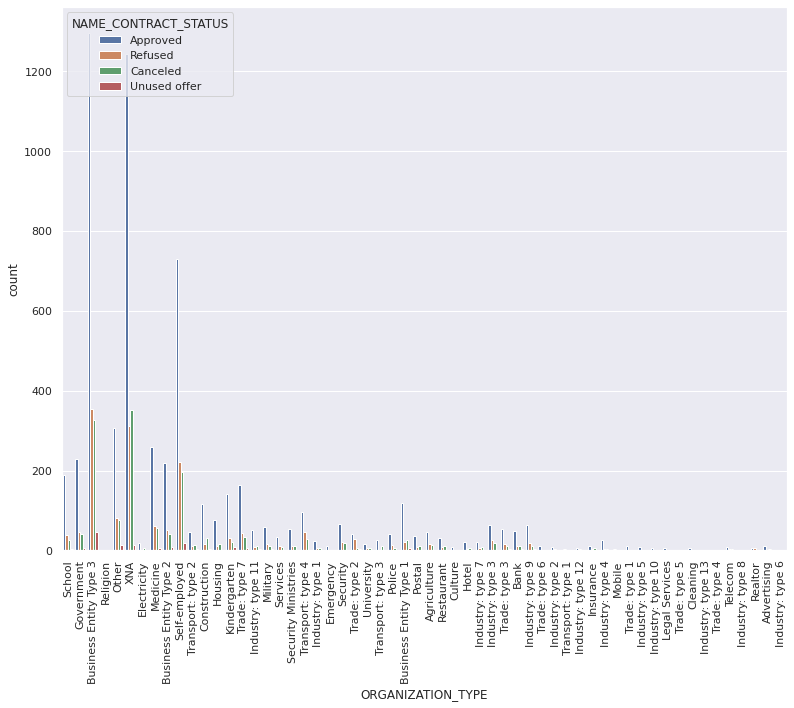

In [ ]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(x=col, hue=hue, data=ptrain_0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 <a list of 58 Text major ticklabel objects>)

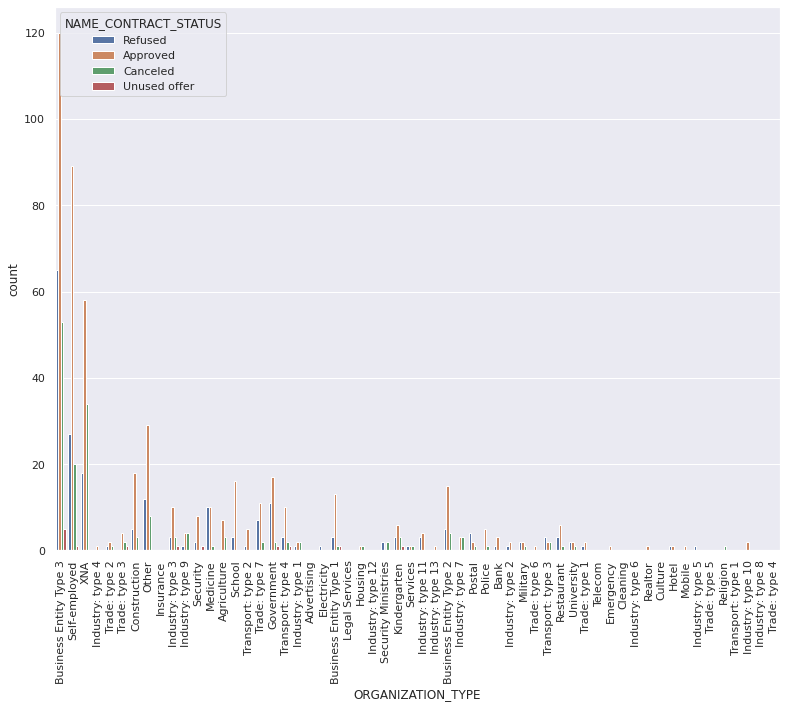

In [ ]:
col = 'ORGANIZATION_TYPE'
hue = 'NAME_CONTRACT_STATUS'
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(x=col, hue=hue, data=ptrain_1)
plt.xticks(rotation=90)

This columns seems to be most important. Bussiness Entity Type 3 and Self-employed tends to be the maxiumum defaulter. The univariate analysis of this dataset was more fruitful than bivariate analysis.

In [ ]:
merged.NAME_CONTRACT_STATUS.value_counts()

Approved        3017
Refused          841
Canceled         750
Unused offer      79
Name: NAME_CONTRACT_STATUS, dtype: int64

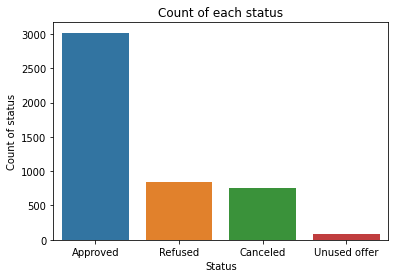

In [ ]:
sns.countplot(merged.NAME_CONTRACT_STATUS)
plt.xlabel('Status')
plt.ylabel('Count of status')
plt.title('Count of each status')
plt.show()

In [ ]:
#lets split on above
approved = merged[merged.NAME_CONTRACT_STATUS == 'Approved']
refused = merged[merged.NAME_CONTRACT_STATUS == 'Refused']
canceled = merged[merged.NAME_CONTRACT_STATUS == 'Canceled']
unused = merged[merged.NAME_CONTRACT_STATUS == 'Unused Offer']

In [ ]:
def plot_func_status(var):
  fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
  
  s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
  ax1.set_title("Refused", fontsize=10)
  ax1.set_xlabel('%s' %var)
  ax1.set_ylabel("Count of Loans")
  s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
  
  s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
  s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
  ax2.set_xlabel('%s' %var)
  ax2.set_ylabel("Count of Loans")
  ax2.set_title("Approved", fontsize=10)
  
  
  s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
  ax3.set_title("Canceled", fontsize=10)
  ax3.set_xlabel('%s' %var)
  ax3.set_ylabel("Count of Loans")
  s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
  plt.show()

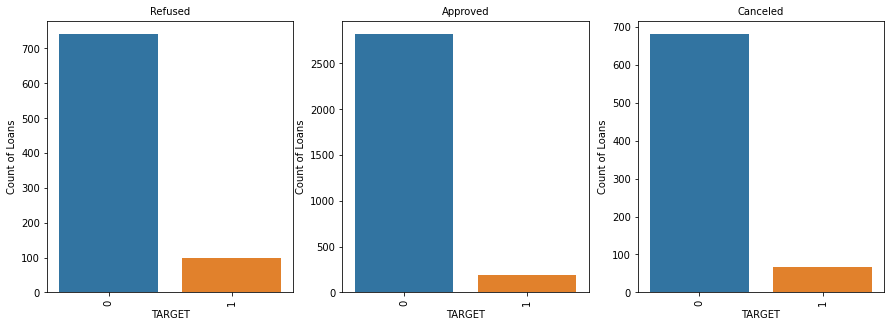

In [ ]:
plot_func_status('TARGET')

In [ ]:
print('Approved Status')
print(approved.TARGET.value_counts(normalize=True))
print('Refused Status')
print(refused.TARGET.value_counts(normalize=True))
print('Canceled Status')
print(canceled.TARGET.value_counts(normalize=True))

Approved Status
0    0.935698
1    0.064302
Name: TARGET, dtype: float64
Refused Status
0    0.882283
1    0.117717
Name: TARGET, dtype: float64
Canceled Status
0    0.909333
1    0.090667
Name: TARGET, dtype: float64


In [ ]:
merged.AMT_INCOME_TOTAL.describe().apply(lambda x: format(x, 'f'))
merged.AMT_INCOME_TOTAL.quantile([0.10,0.20,0.30,0.40,0.50,0.60, 0.70, 0.80, 0.90, 0.95, 0.99, 0.995, 0.998, 1])


0.100        81000.0
0.200        99000.0
0.300       112500.0
0.400       135000.0
0.500       148500.0
0.600       166500.0
0.700       189000.0
0.800       225000.0
0.900       270000.0
0.950       337500.0
0.990       472500.0
0.995       630000.0
0.998       765000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Thus we can remove more than 99.8%ile data as the difference is very high.

In [ ]:
#merged=merged[merged.AMT_INCOME_TOTAL<np.nanpercentile(merged['AMT_INCOME_TOTAL'], 80)]
#percentiles = merged['AMT_INCOME_TOTAL'].quantile([0.01,0.90]).values
#merged['AMT_INCOME_TOTAL'] = np.clip(merged['AMT_INCOME_TOTAL'], percentiles[0], percentiles[1])
refused=refused[refused.AMT_INCOME_TOTAL<np.nanpercentile(refused['AMT_INCOME_TOTAL'], 99.8)]
approved=approved[approved.AMT_INCOME_TOTAL<np.nanpercentile(approved['AMT_INCOME_TOTAL'], 99.8)]

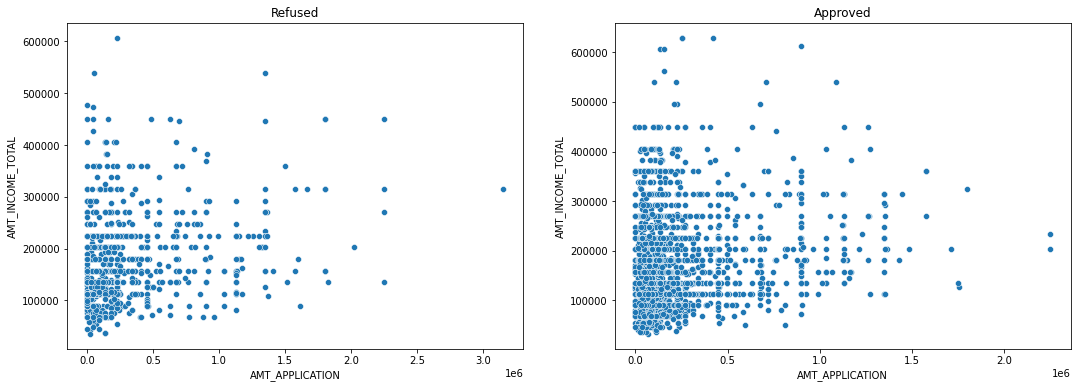

In [ ]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'AMT_APPLICATION',y = 'AMT_INCOME_TOTAL', data = refused)
plt.title('Refused')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'AMT_APPLICATION',y = 'AMT_INCOME_TOTAL', data = approved)
plt.title('Approved')
plt.show()

### *AMT_APPLICATION higher than 200k had a higher rejection rate. Also loan rejection rate was much lower if the income was higher than 550k *